In [1]:
%run data-analysis.ipynb

In [2]:
# Plot histogram of %accuracy for each antimere        

def plotHistograms(df, aligner_material, measure_type):
    '''Plots histogram & outputs .PDF for a given
    aligner_material (EX30 or LD30) and
    measure_type (.cc, .ctd, .ct, or .gm)
    
    plots unfiltered & filtered data (cases where predicted exp > threshold)
    '''
    
    pp = PdfPages('output/histograms/histograms-%s%s.pdf' % (aligner_material, measure_type))
    
    sns.set('poster', font_scale=1.1)
    
    for antimere in ANTIMERES:
        if measure_type == '.cc' and '7' in antimere:
            continue
        full_antimere = antimere+measure_type

        f = plt.figure()

        plt.subplot(1, 2, 1)

        col1 = getColumn(df, '%s %%acc' % full_antimere, antimere, False, measure_type, aligner_material).dropna()            
        col1.hist(bins=10, facecolor='blue')
        plt.title('%s %s\n%%acc\nmean=%s\nn=%s' % (aligner_material, full_antimere, col1.mean(), len(col1)))

        plt.xlabel('% Accuracy')
        plt.ylabel('Frequency')

        # Plot histogram of %accuracy > HISTOGRAM_THRESHOLD for each antimere
        plt.subplot(1, 2, 2)

        col2 = getColumn(df, '%s %%acc' % full_antimere, antimere, HISTOGRAM_THRESHOLD, measure_type, aligner_material).dropna()            
        col2.hist(bins=10, facecolor='green')
        plt.title('%s %s\n%%acc when predExp > %s mm\nmean=%s\nn=%s' % (aligner_material, full_antimere, HISTOGRAM_THRESHOLD, col2.mean(), len(col2)))

        plt.xlabel('% Accuracy')
        plt.ylabel('Frequency')

        pp.savefig(f, bbox_inches="tight")
        plt.show()
    pp.close()

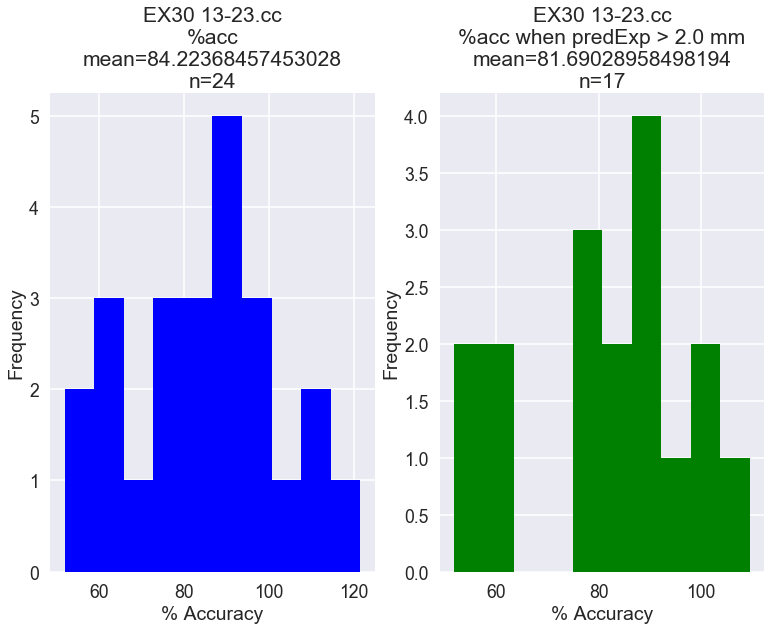

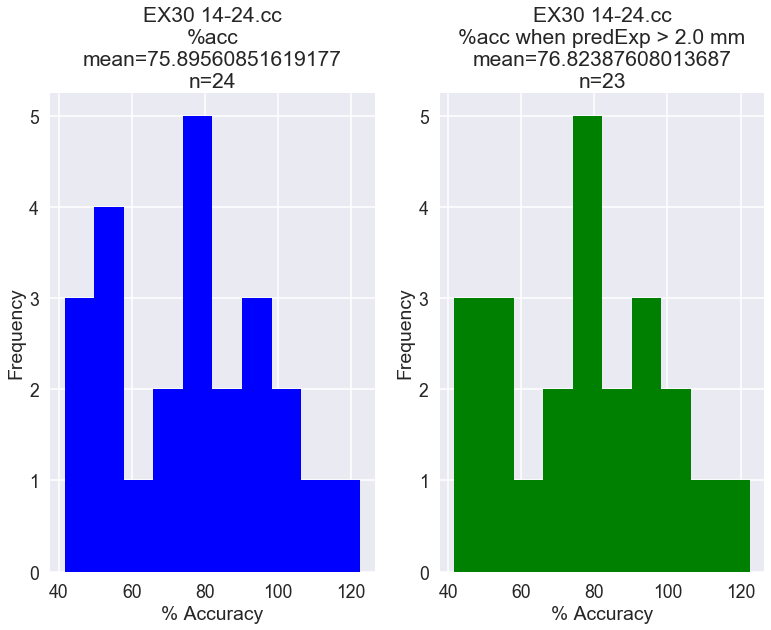

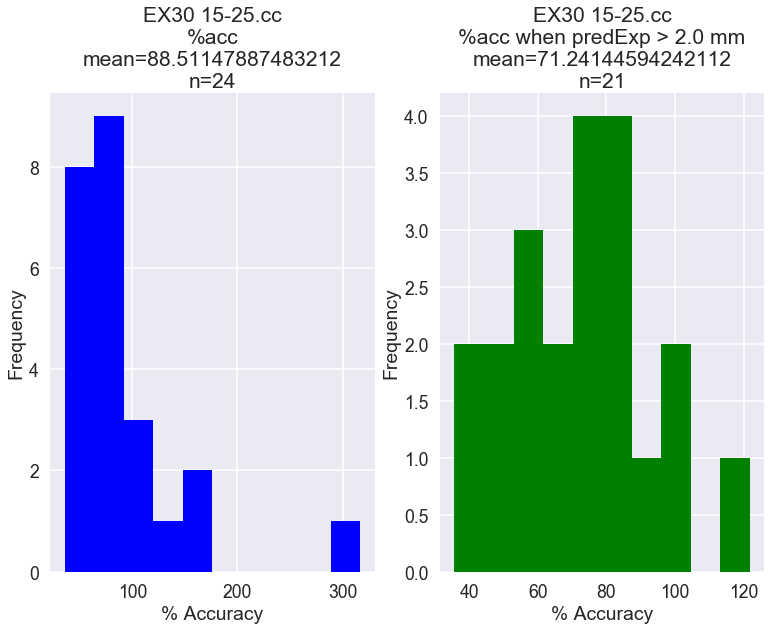

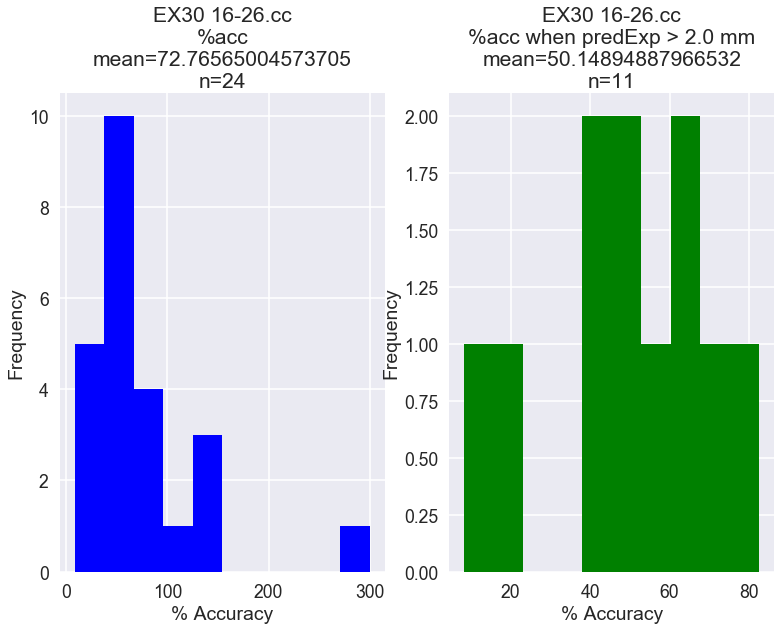

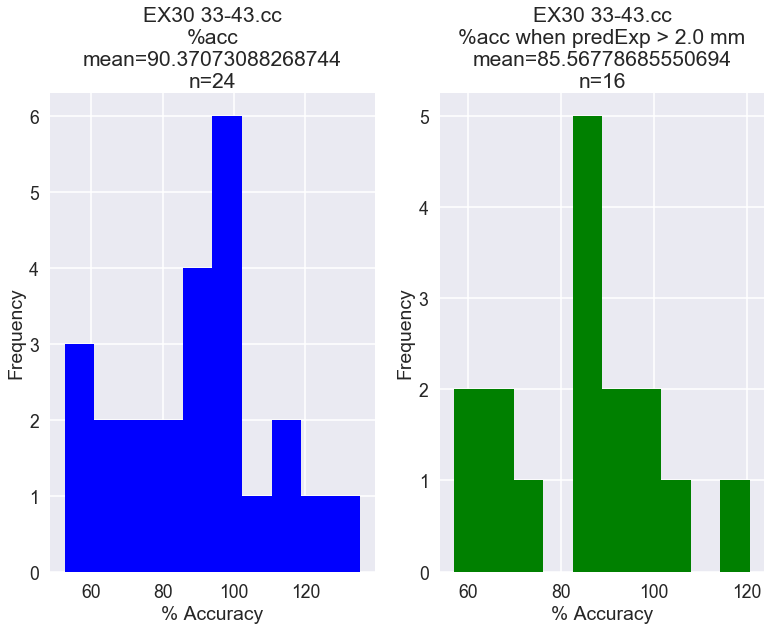

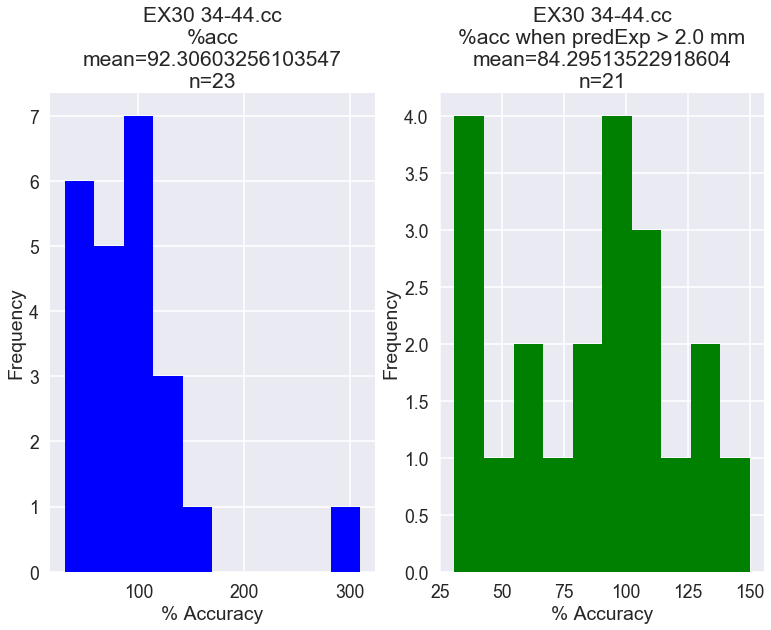

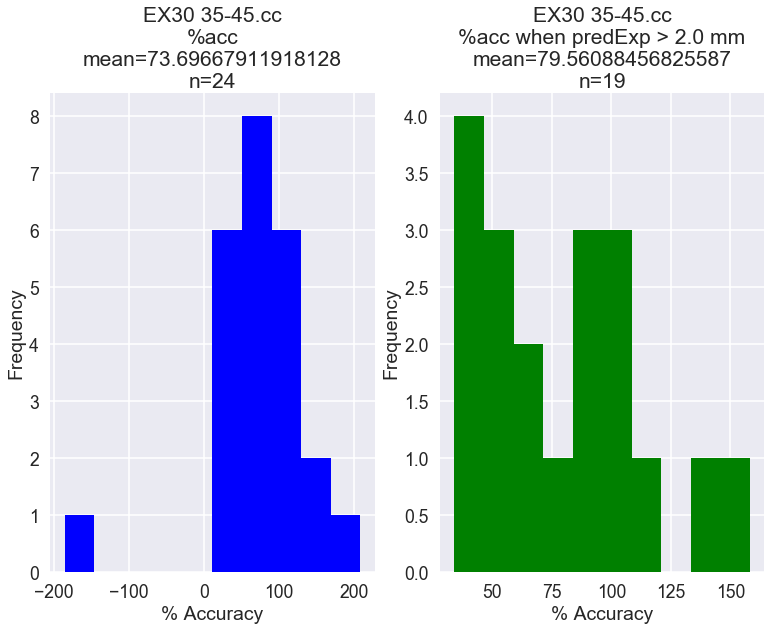

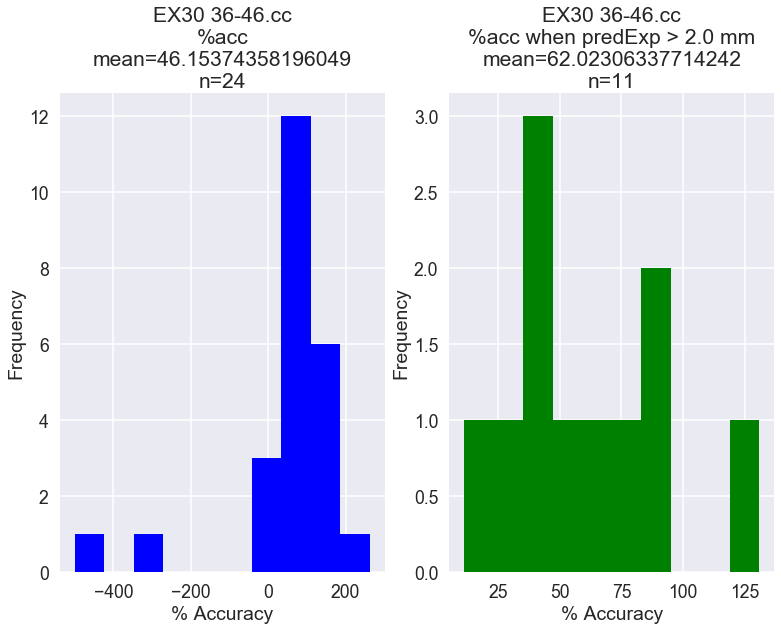

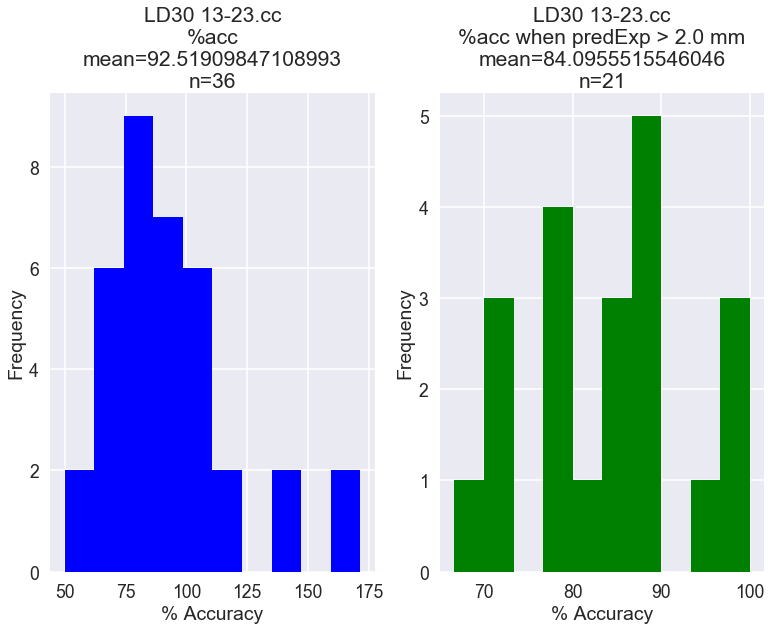

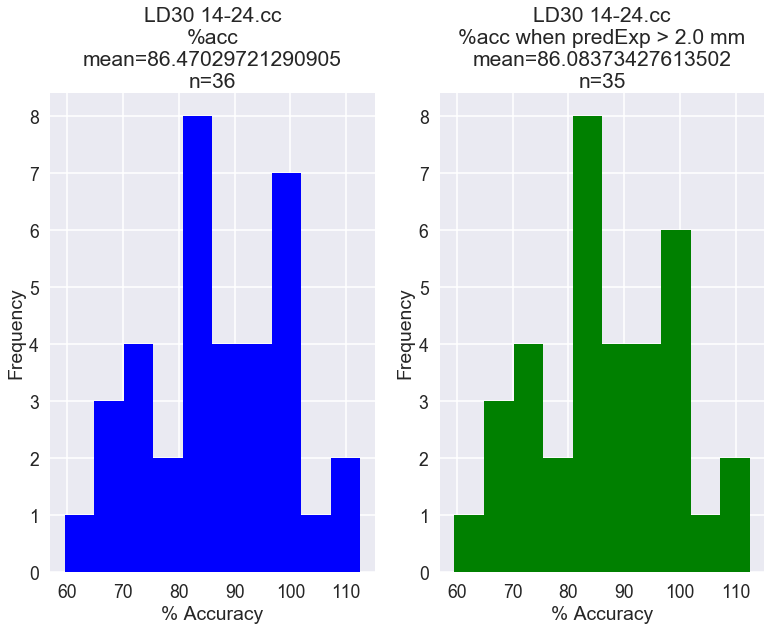

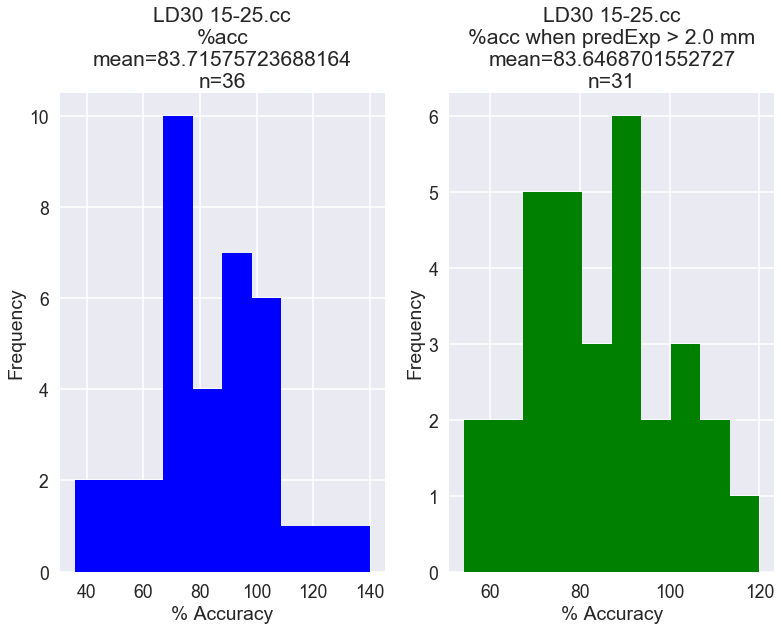

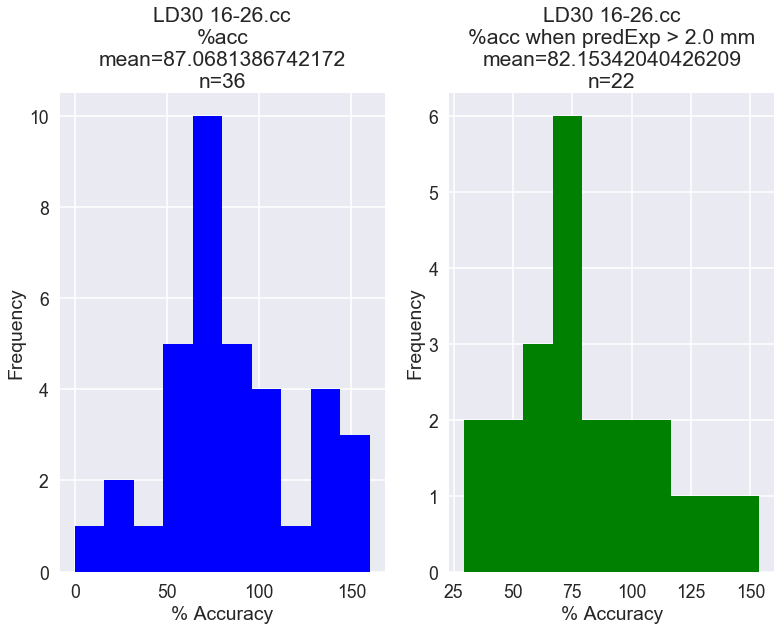

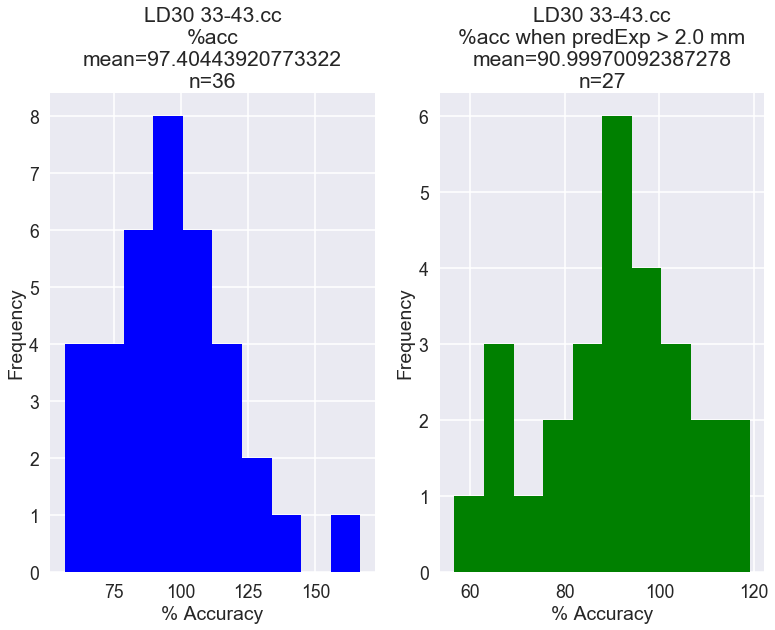

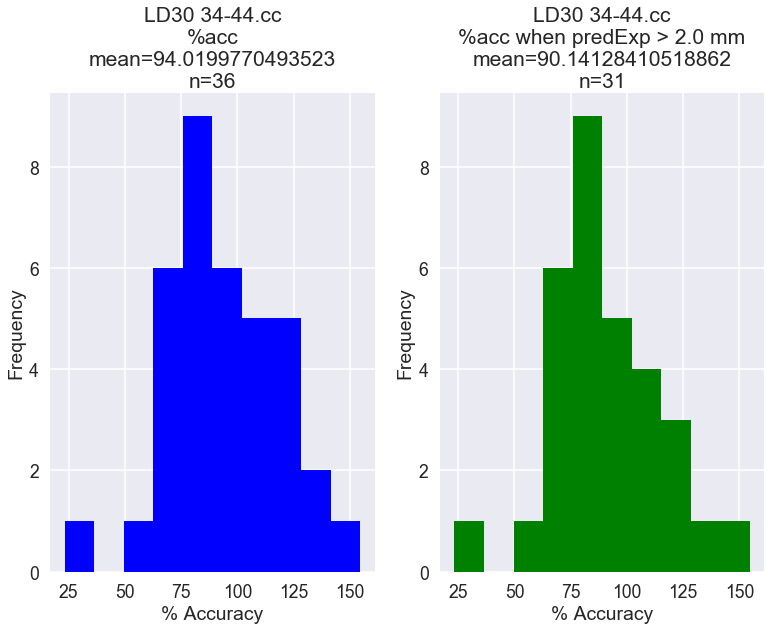

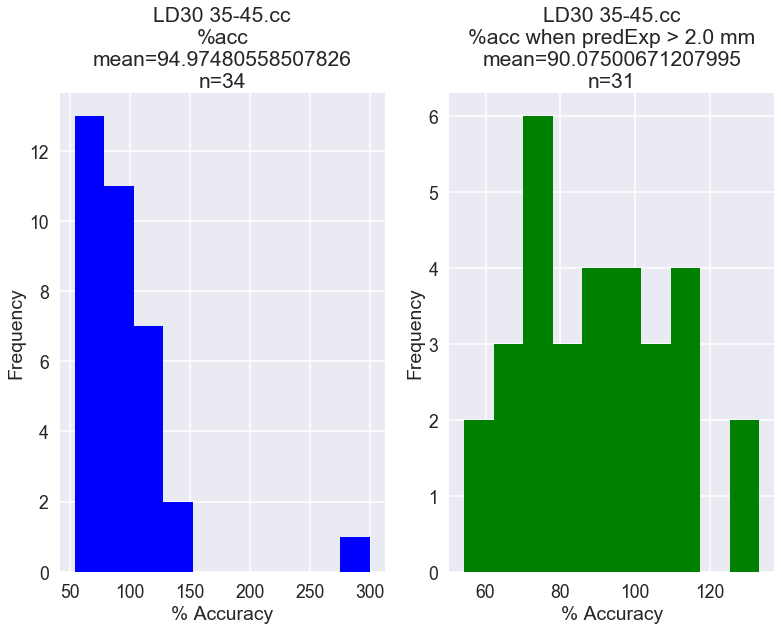

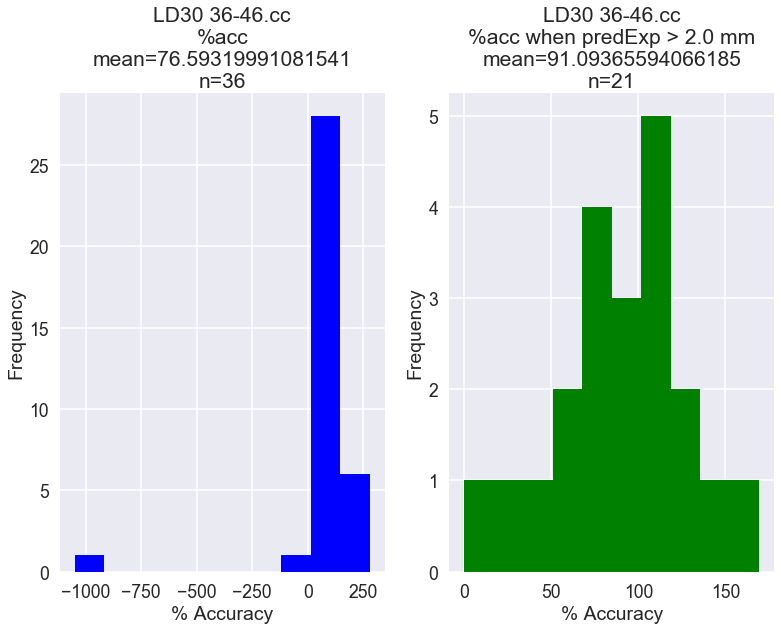

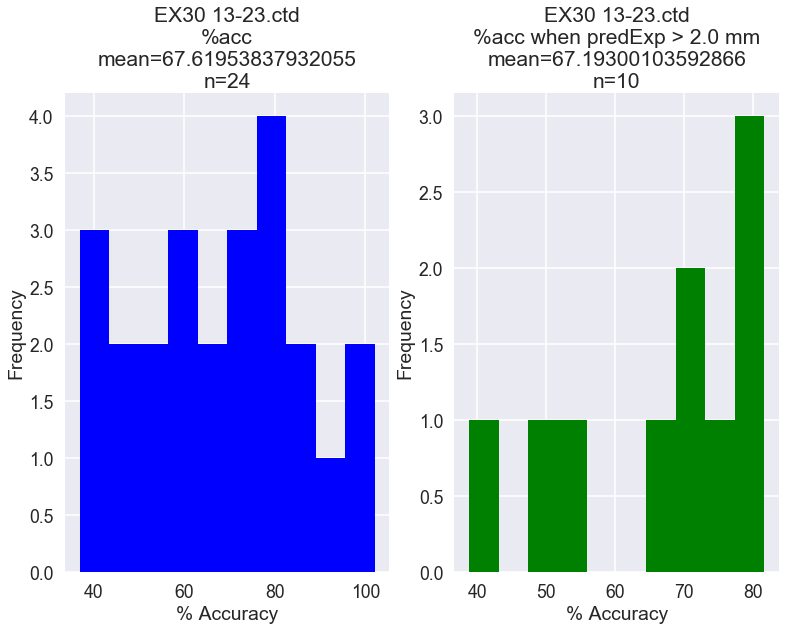

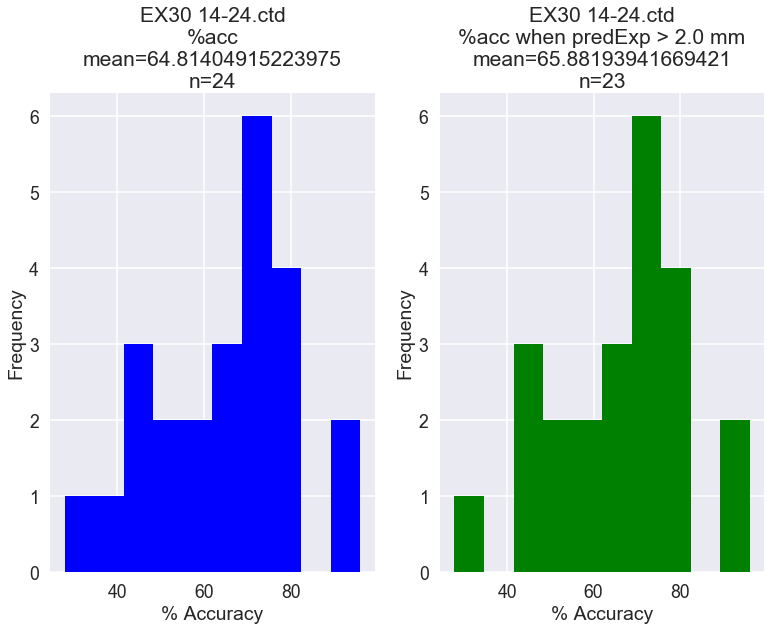

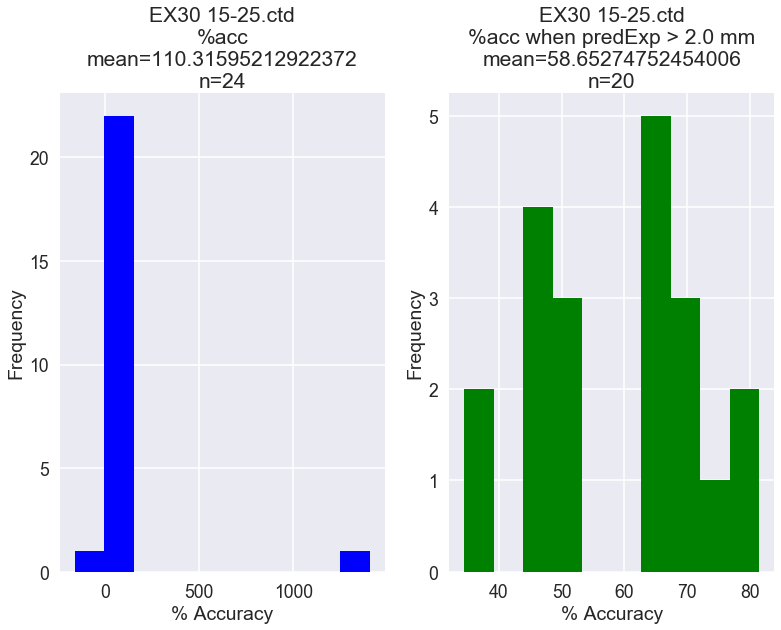

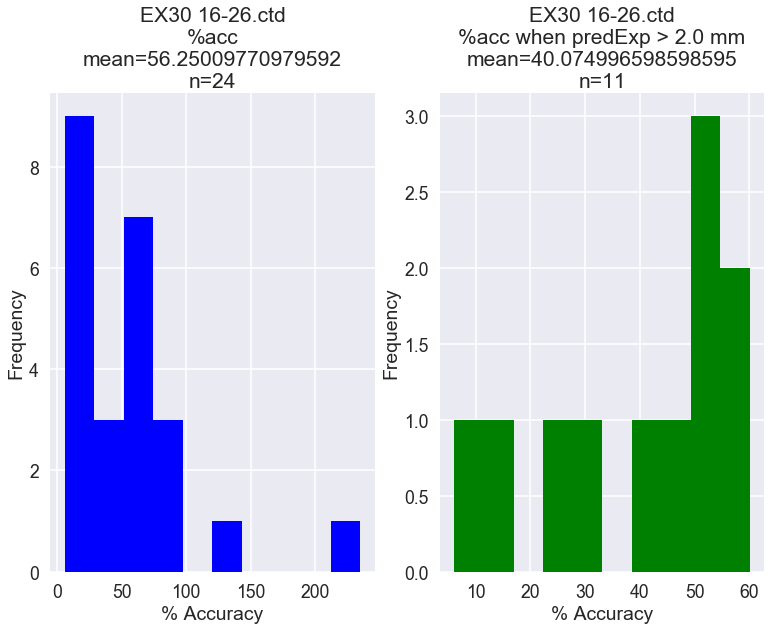

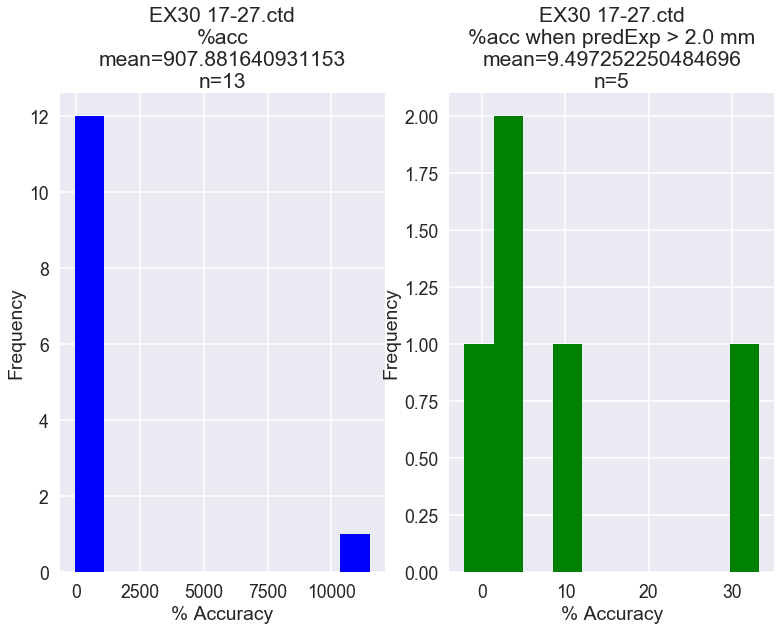

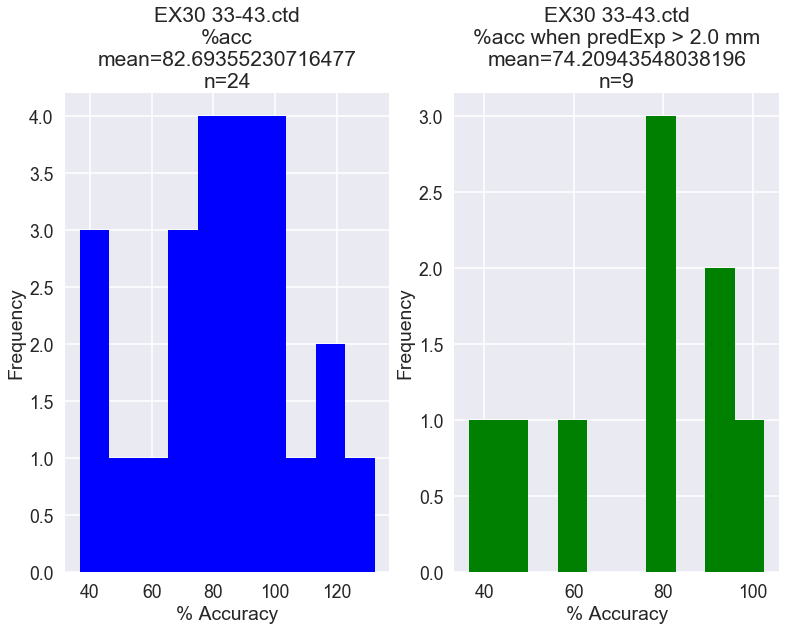

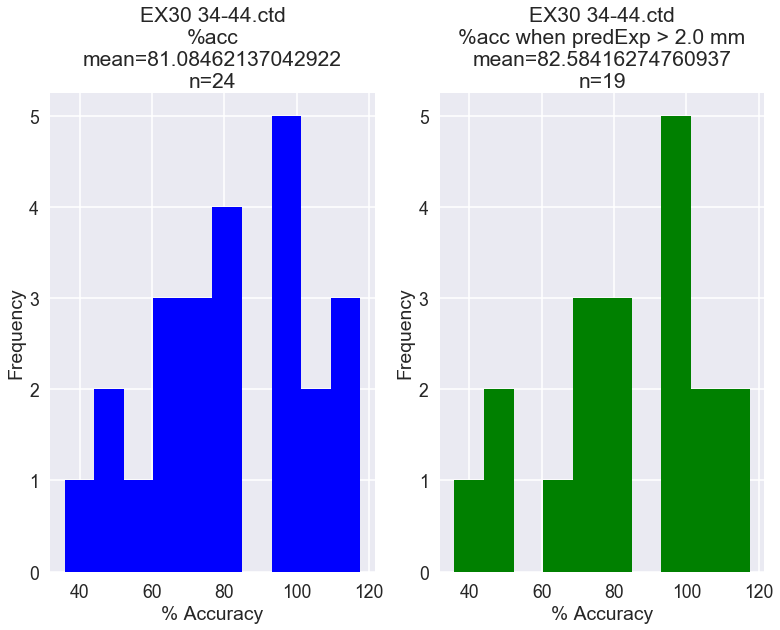

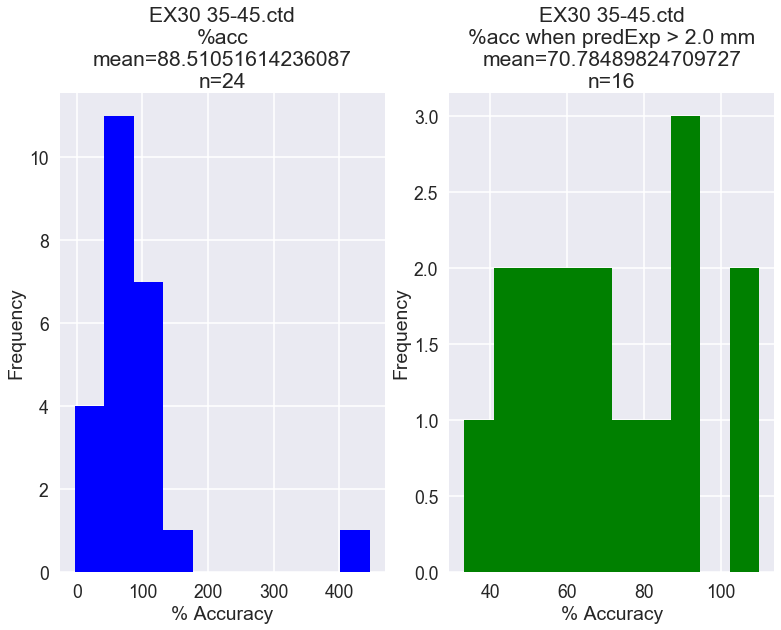

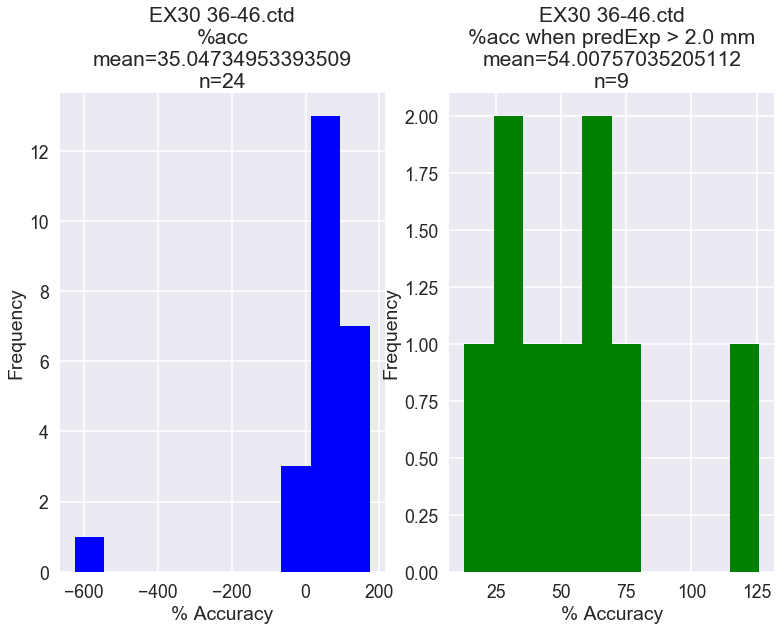

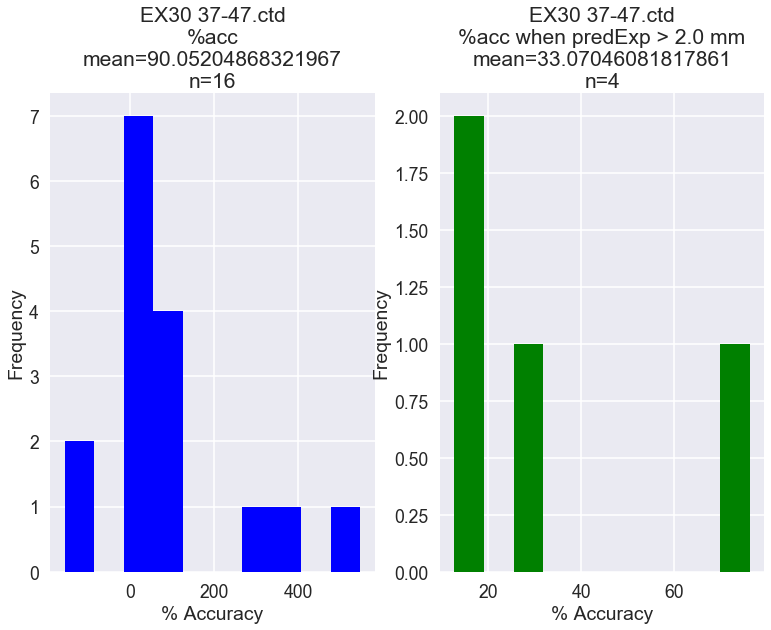

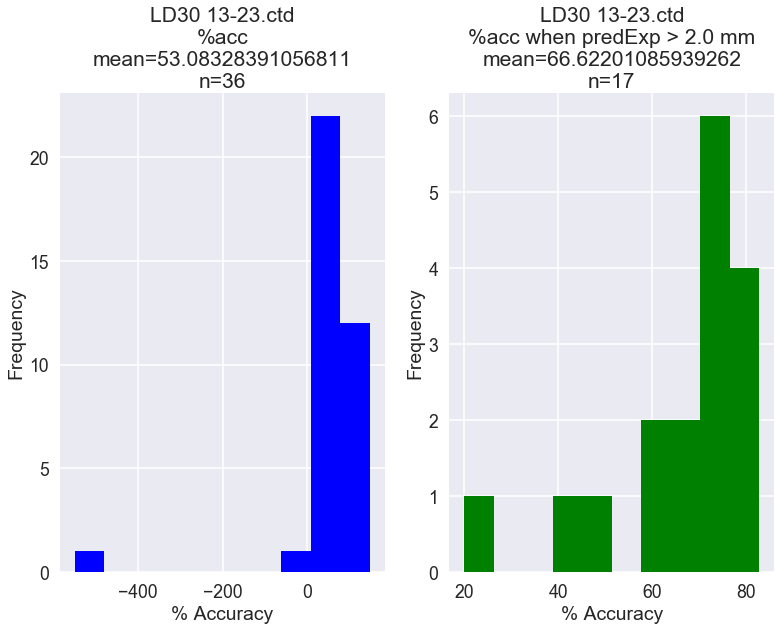

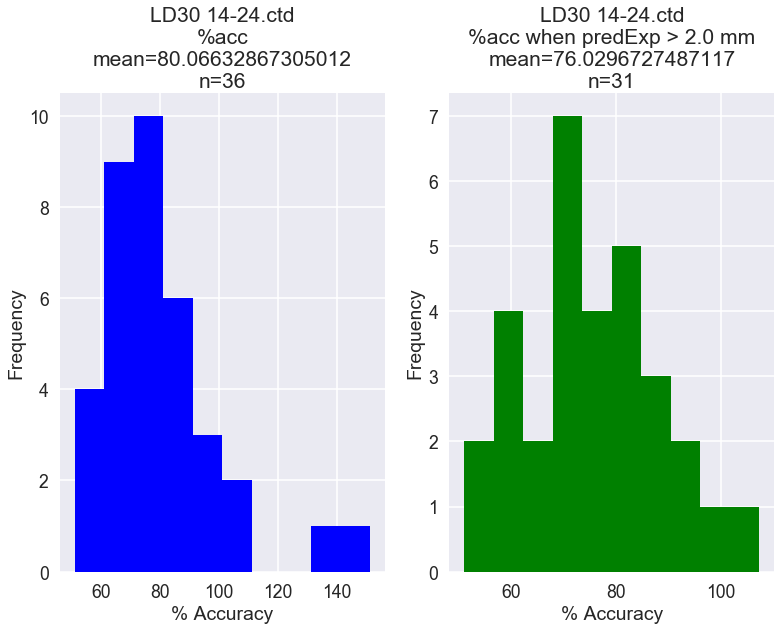

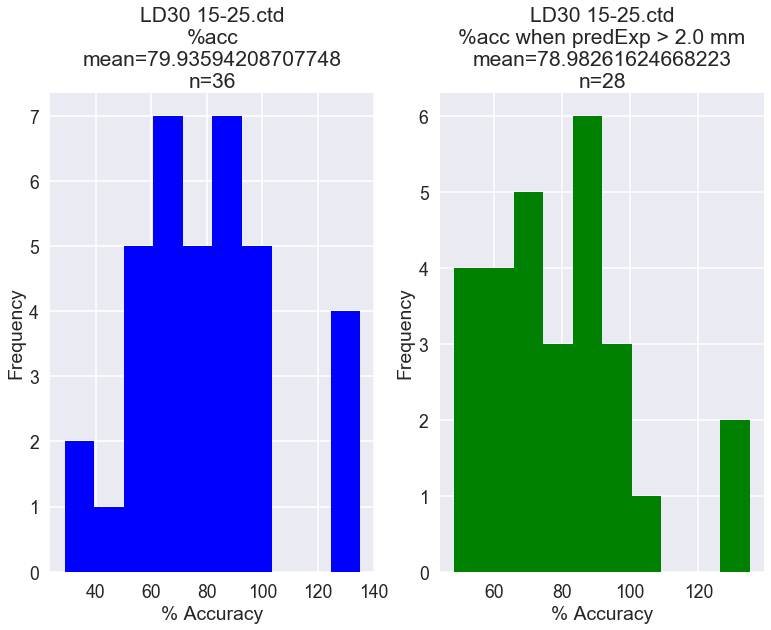

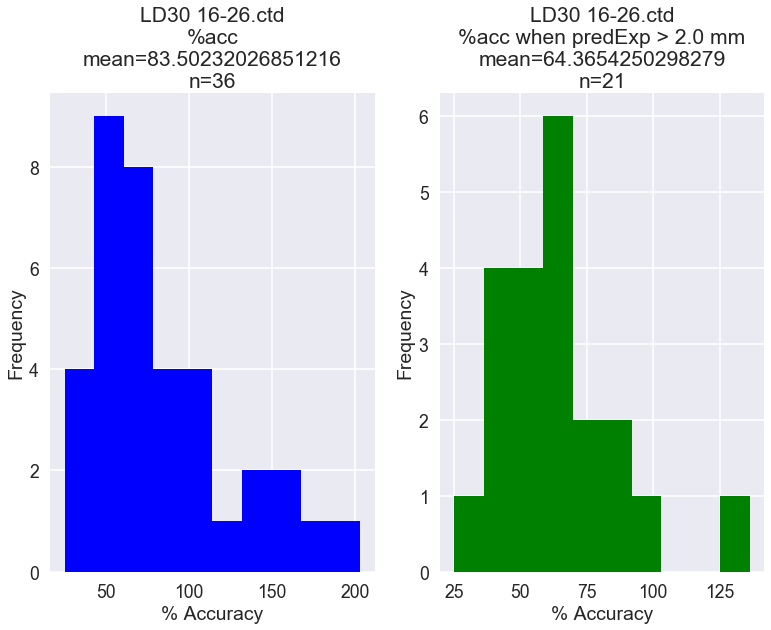

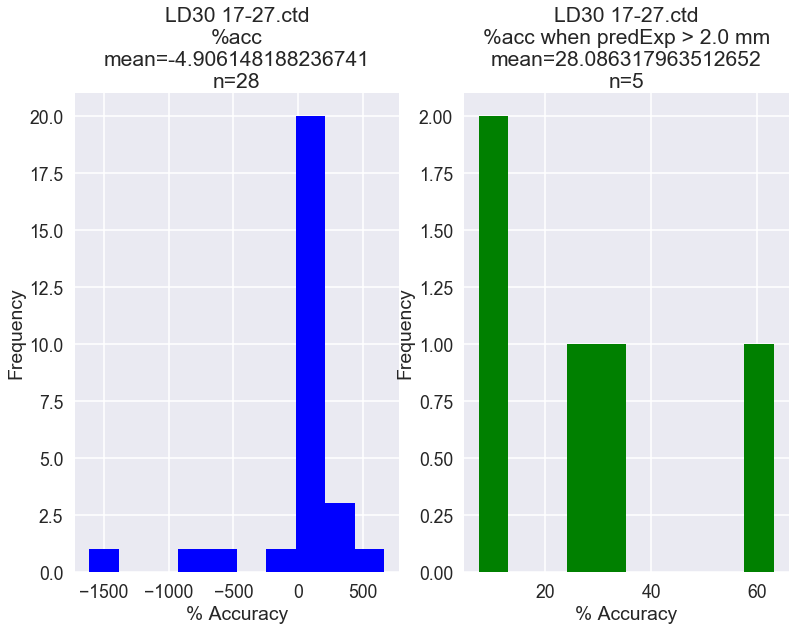

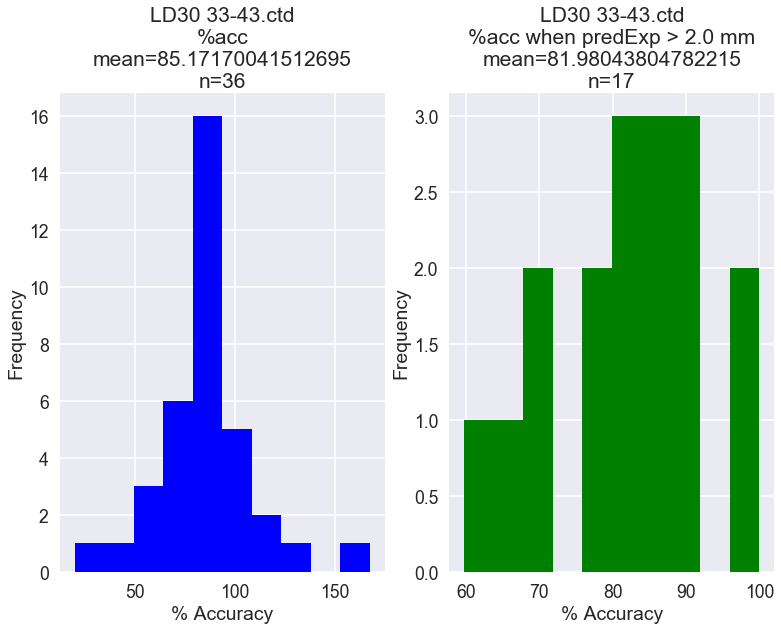

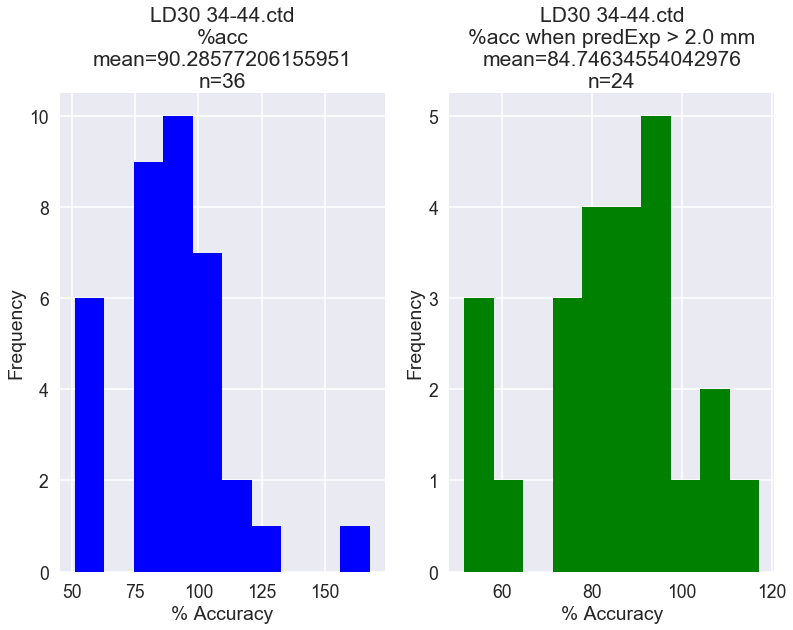

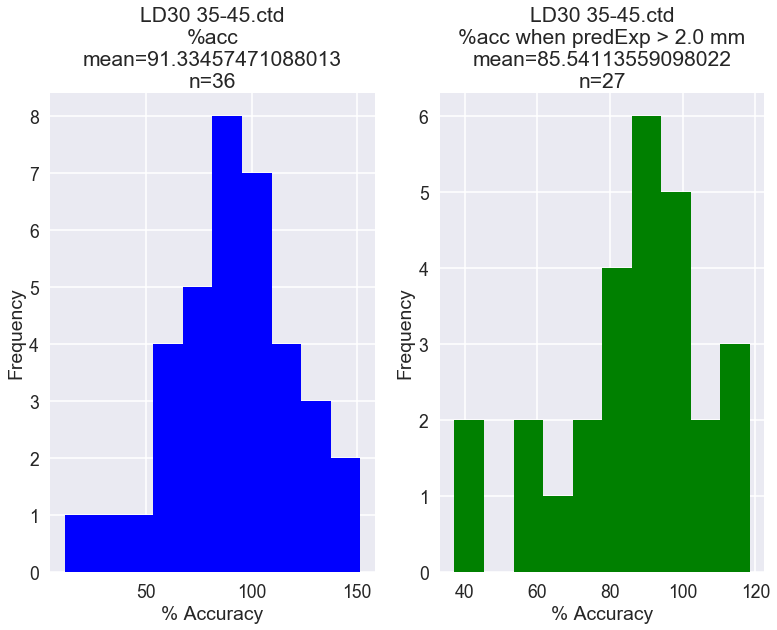

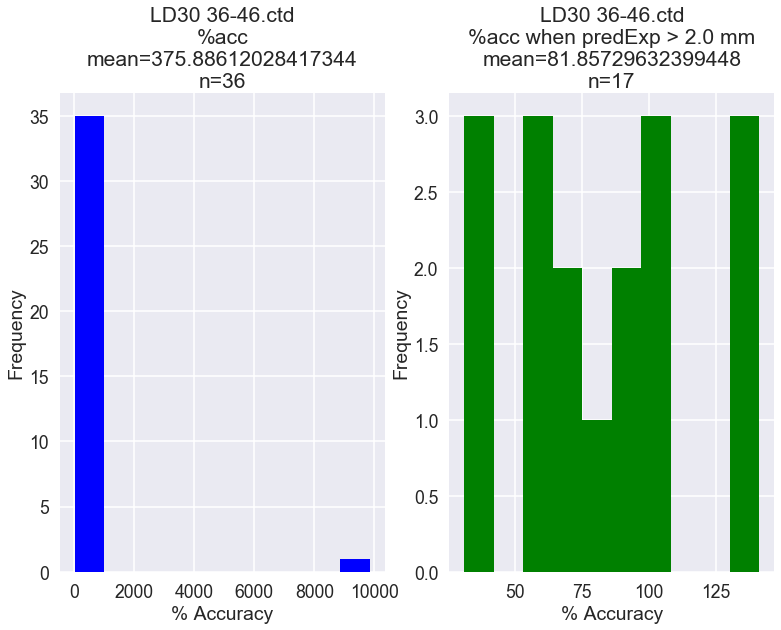

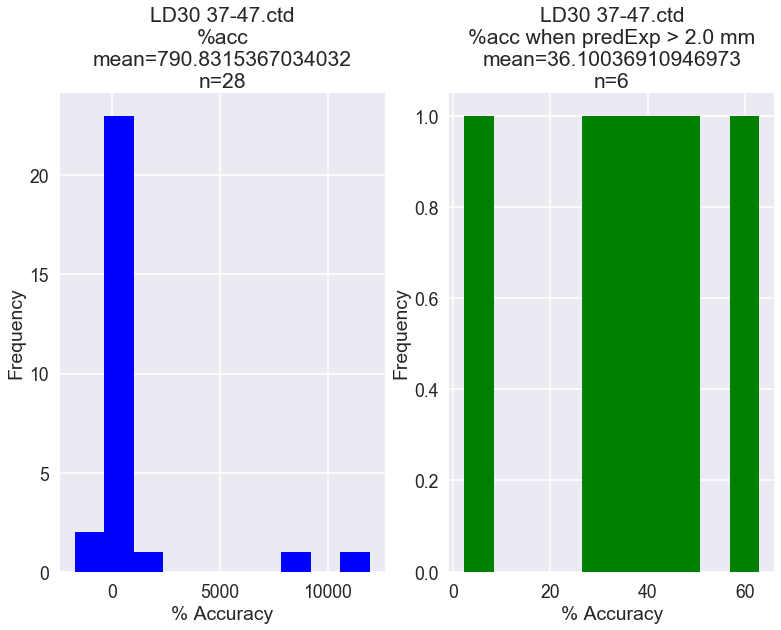

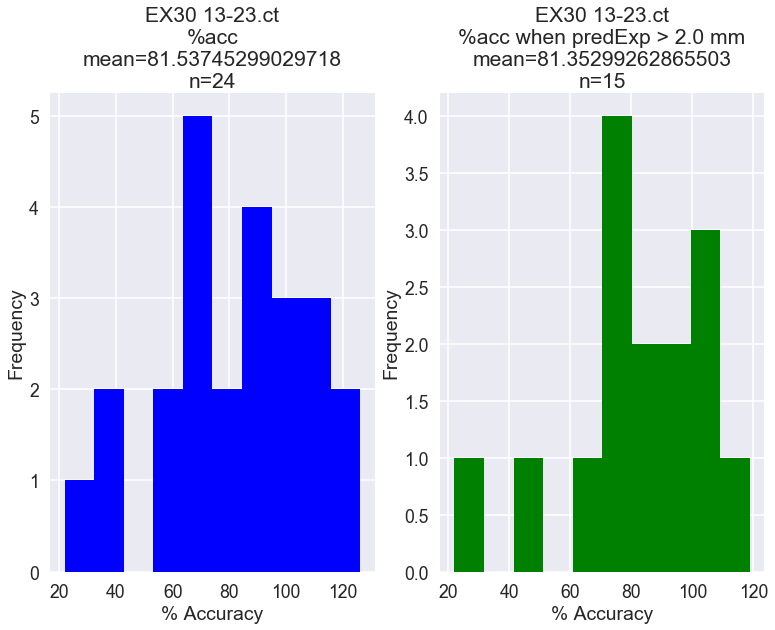

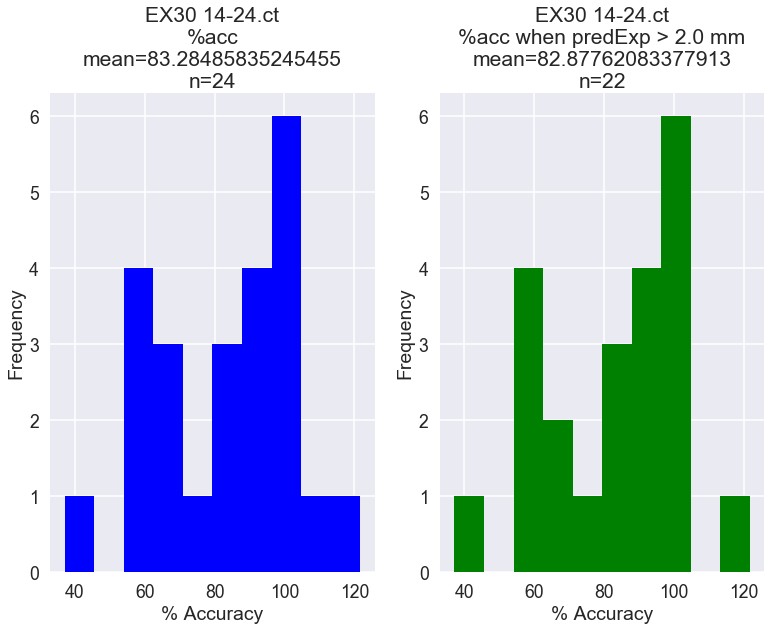

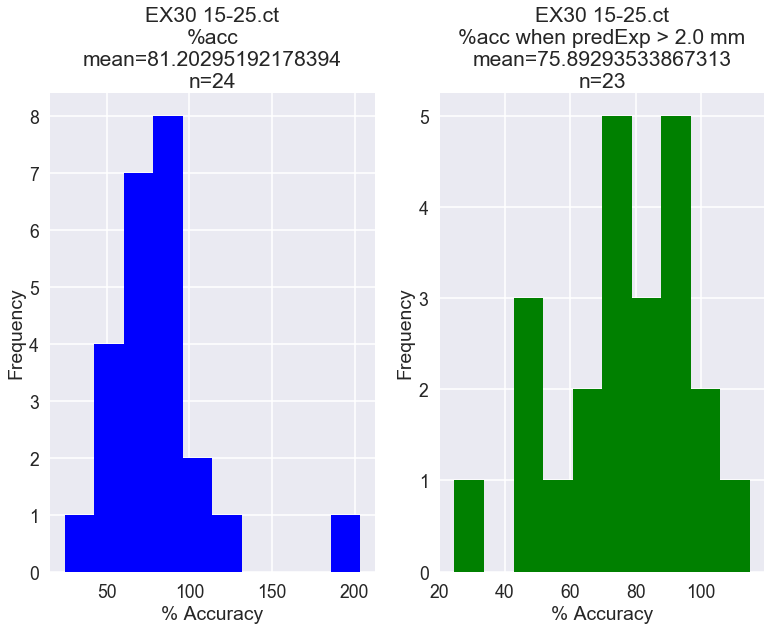

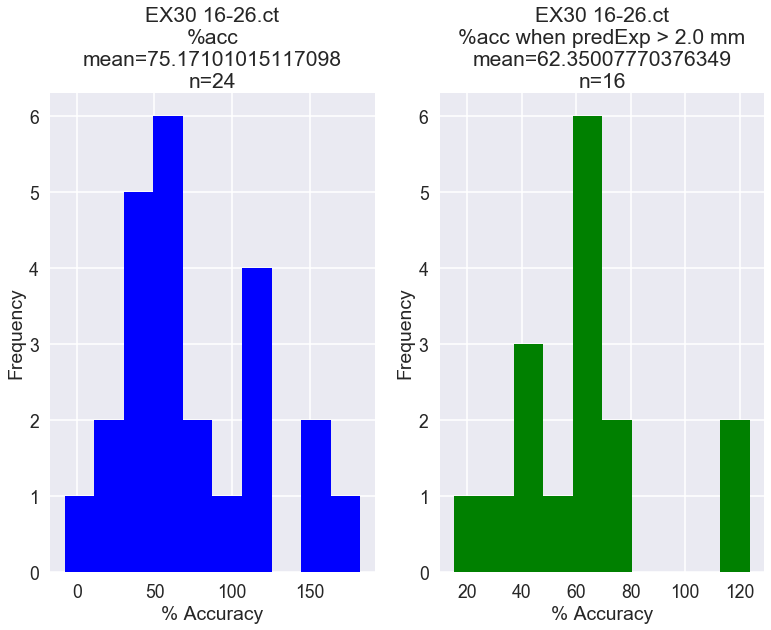

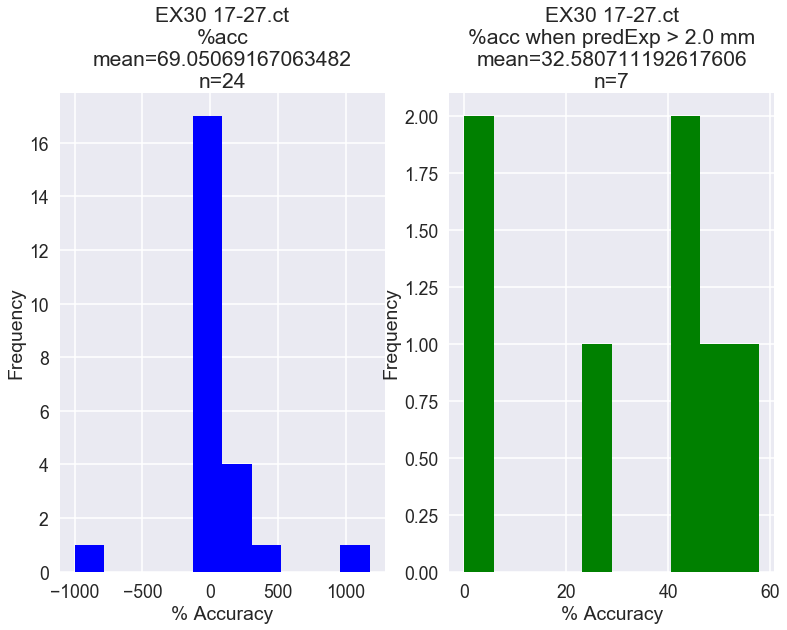

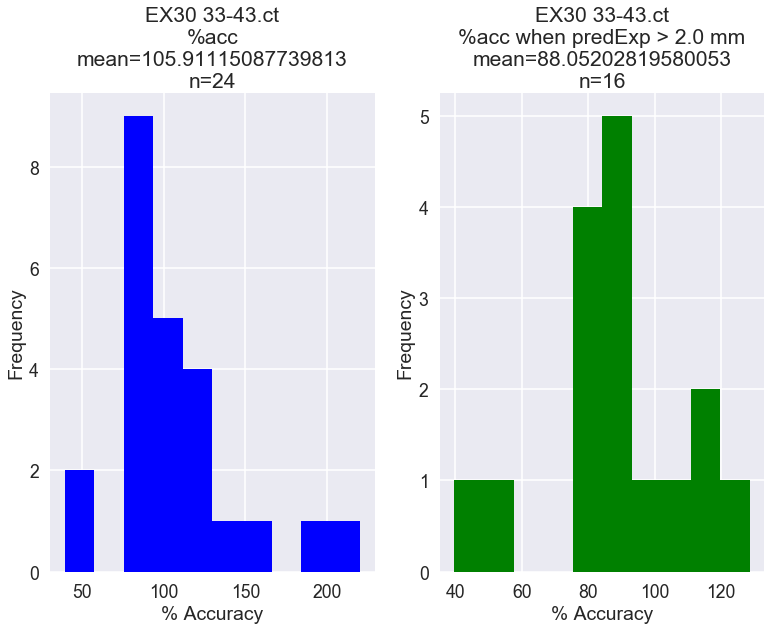

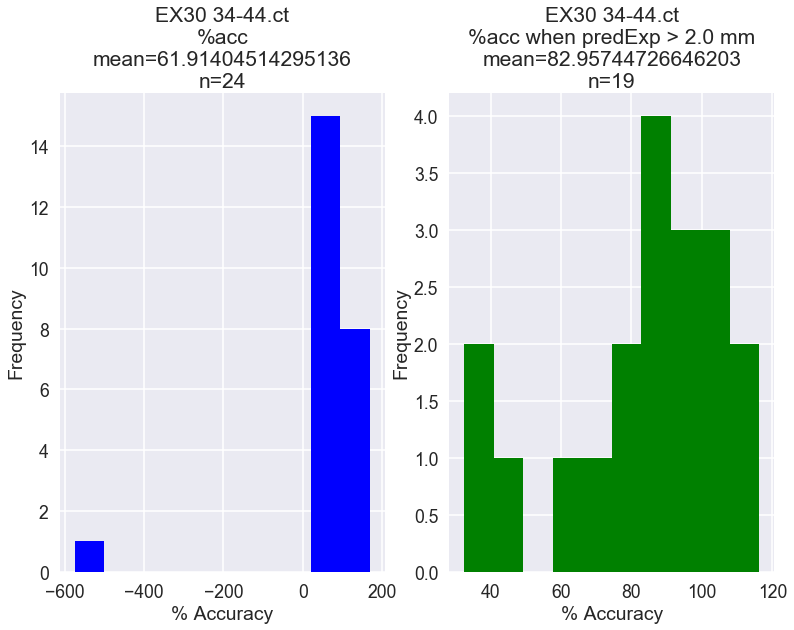

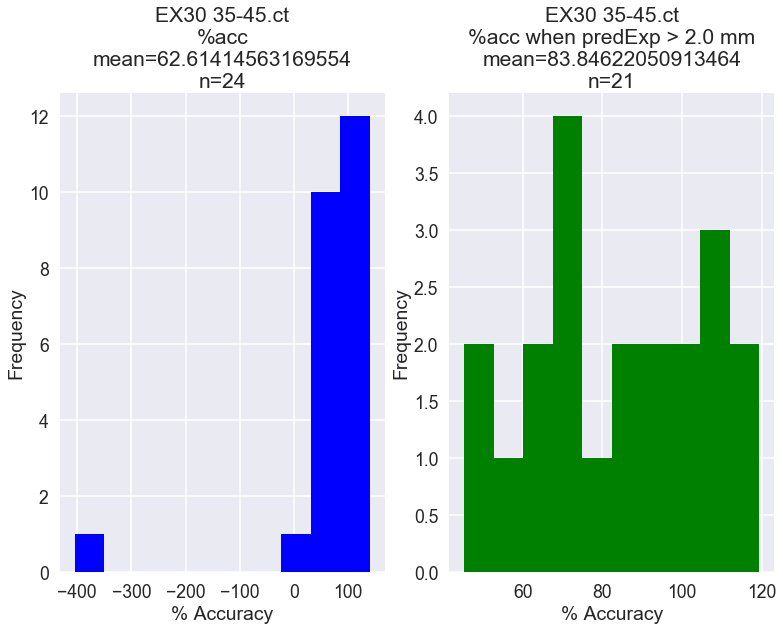

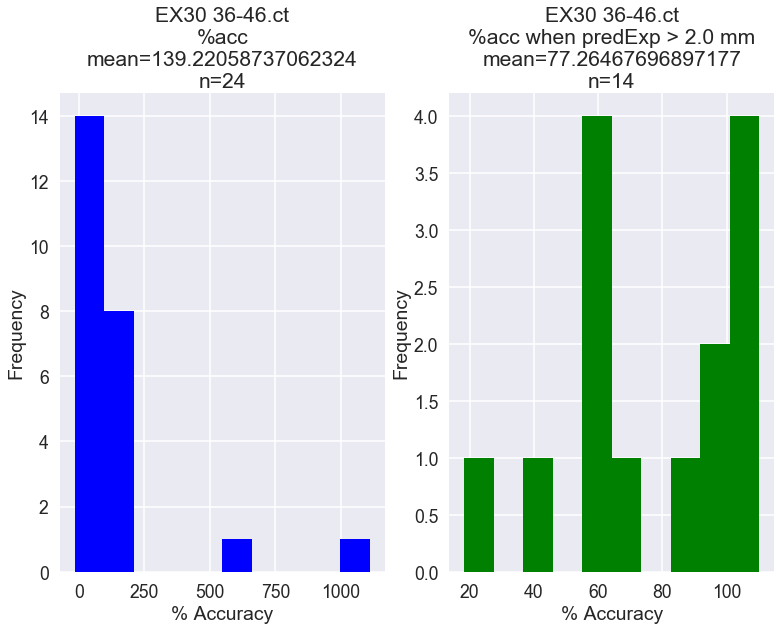

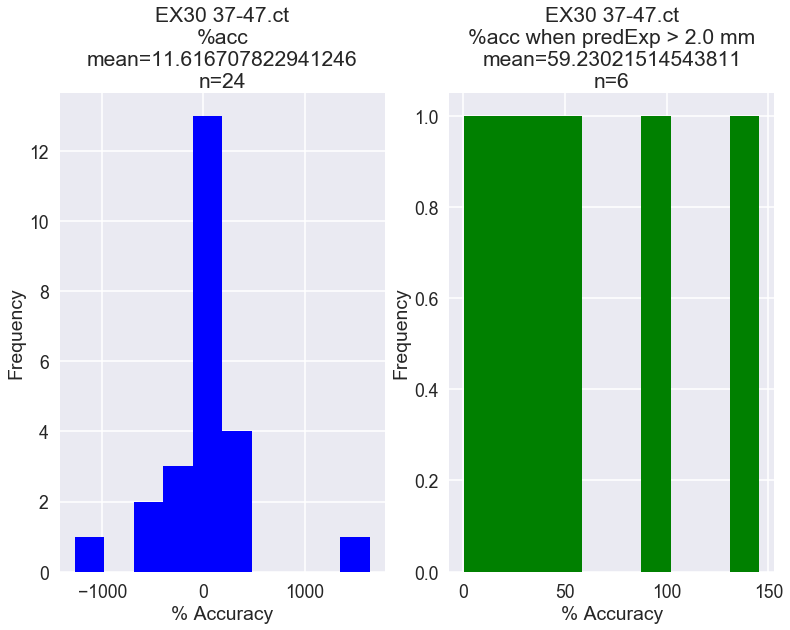

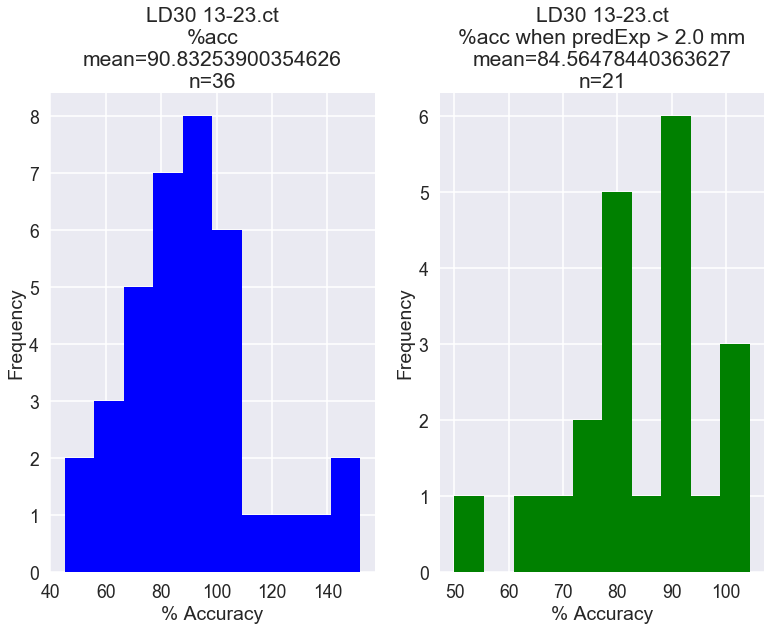

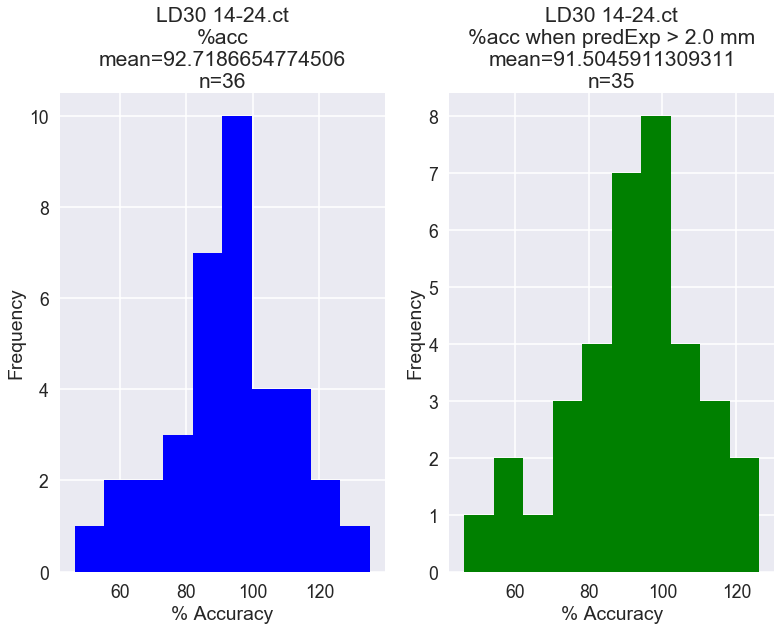

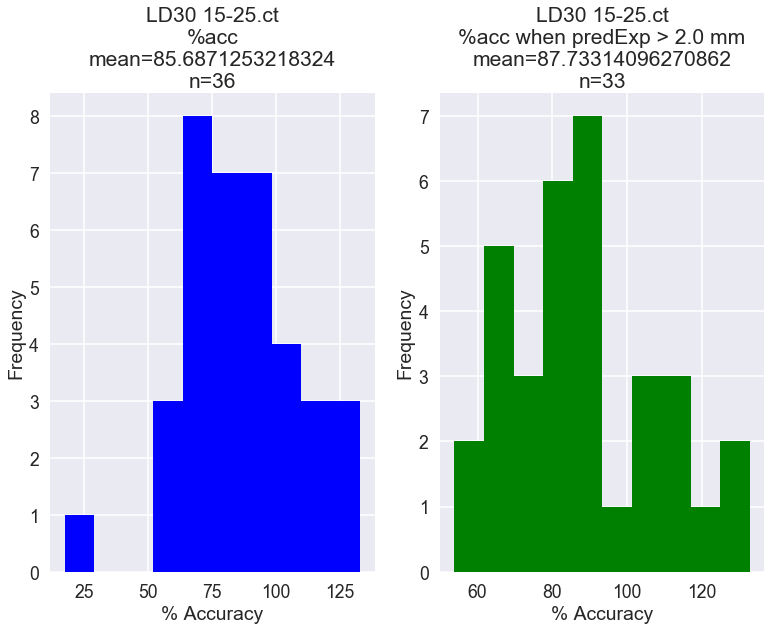

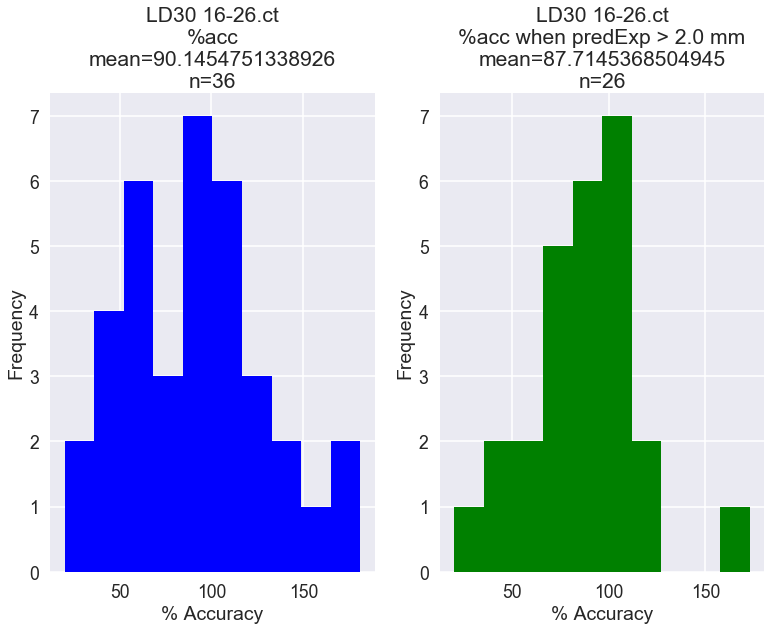

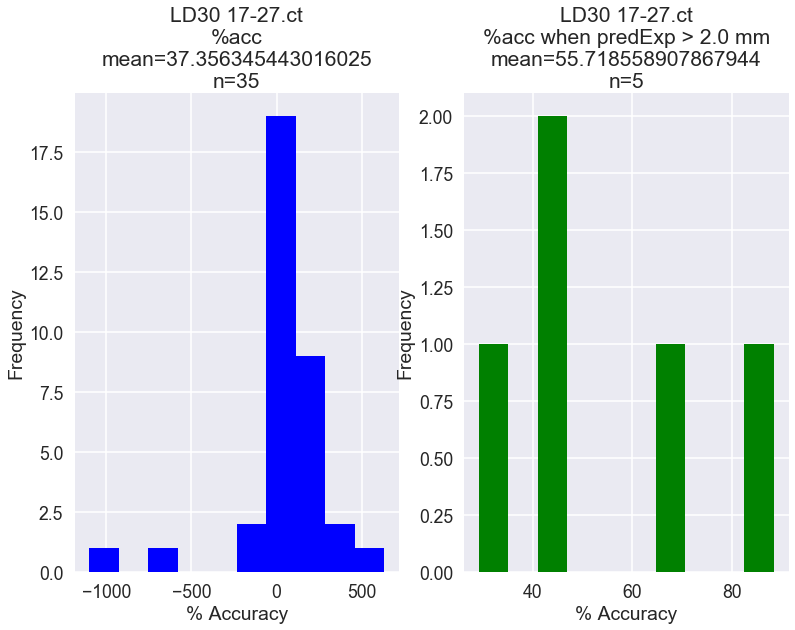

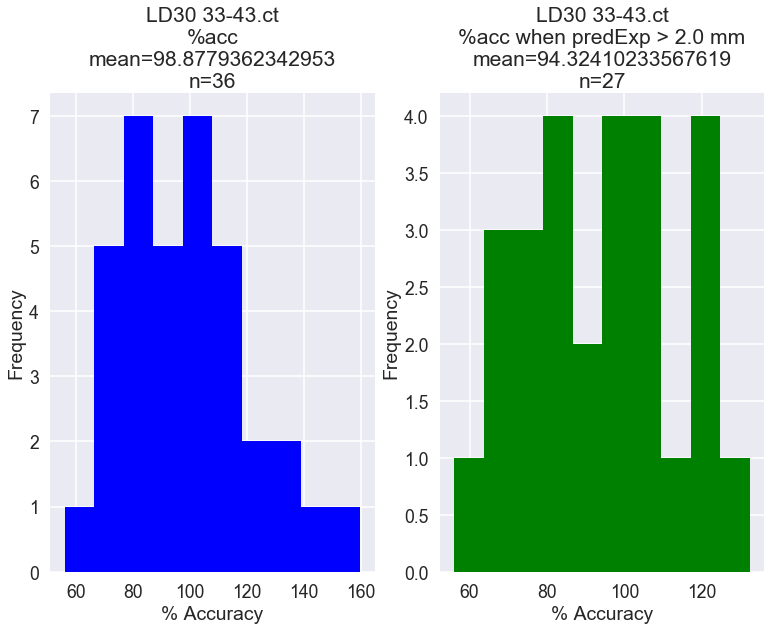

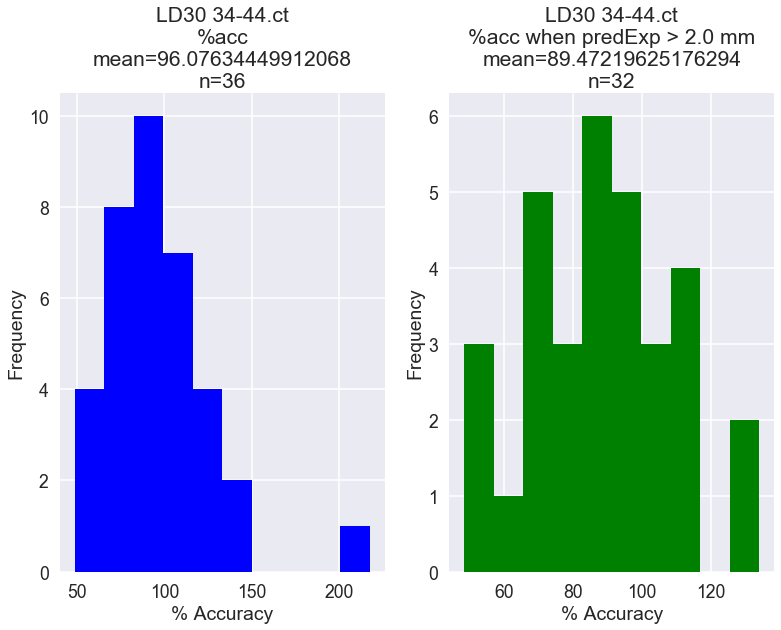

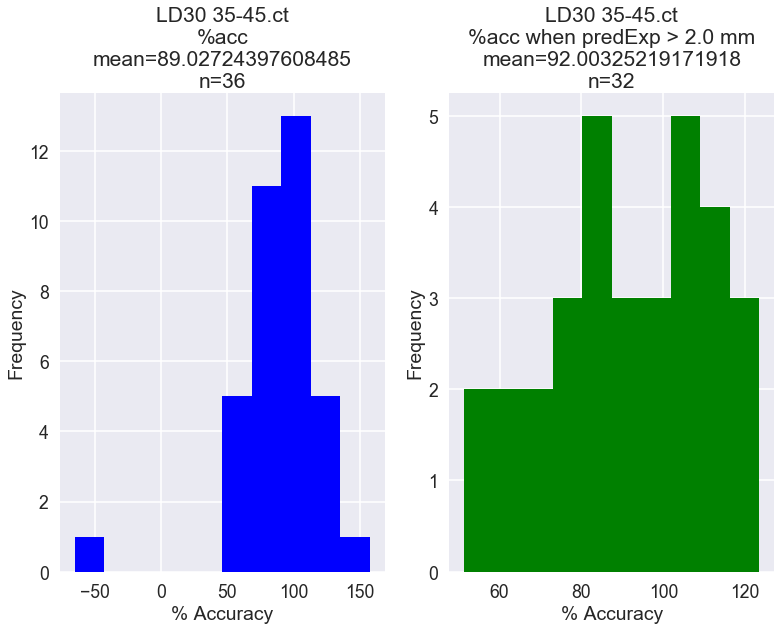

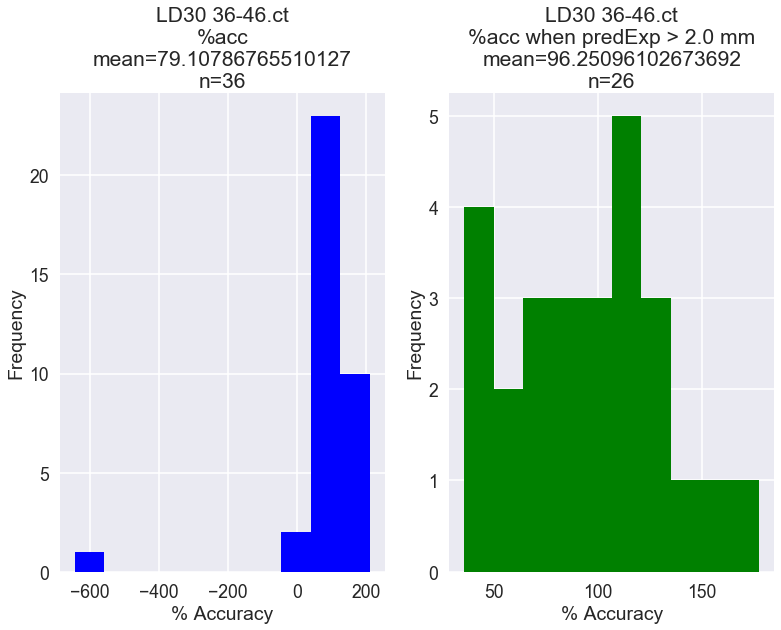

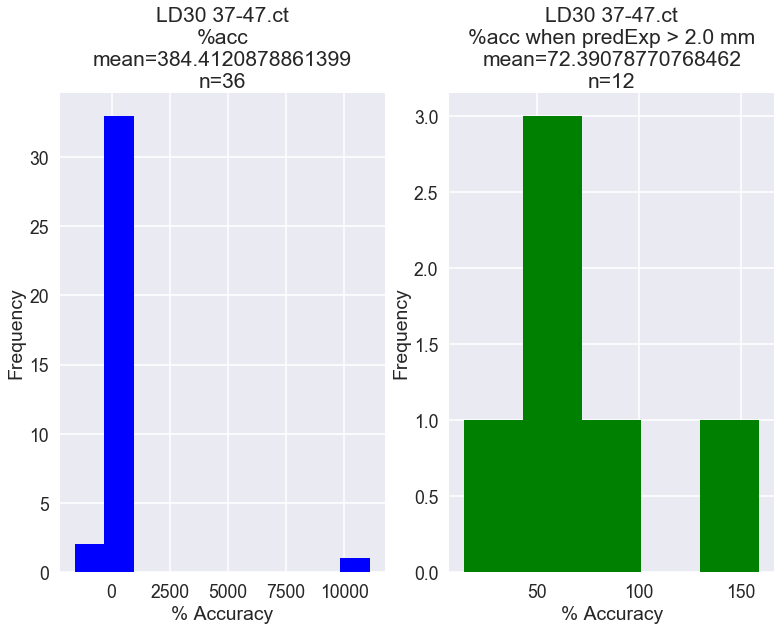

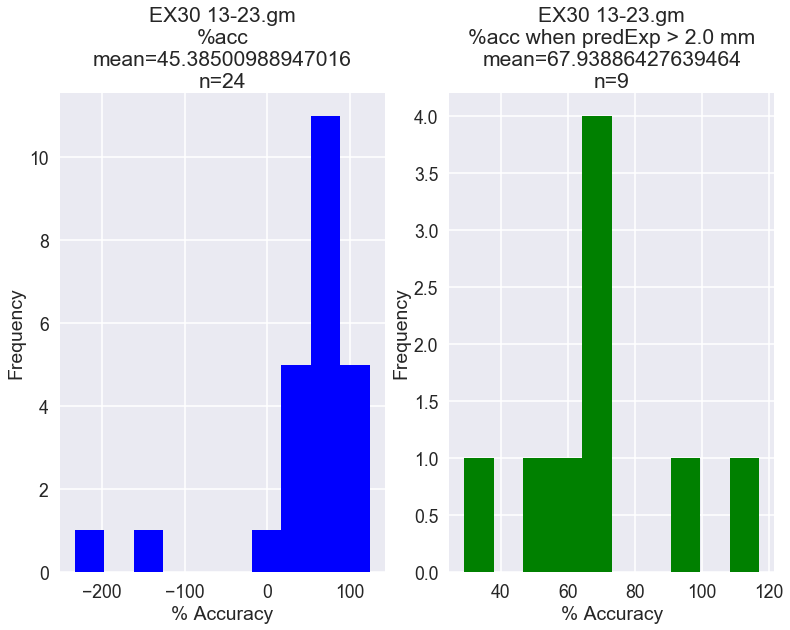

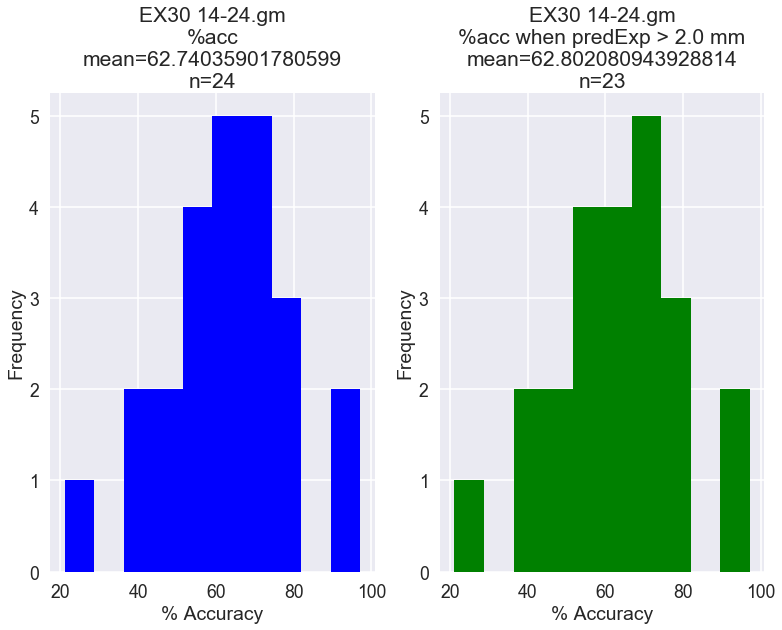

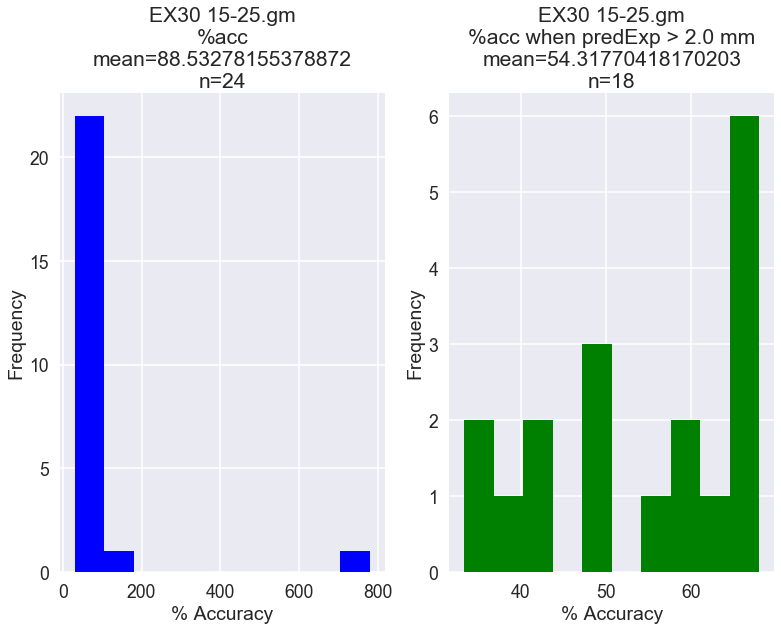

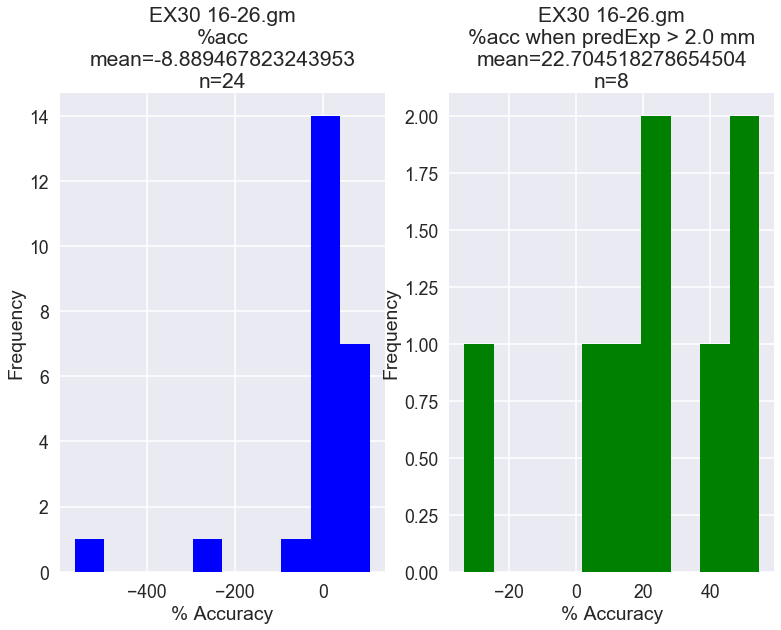

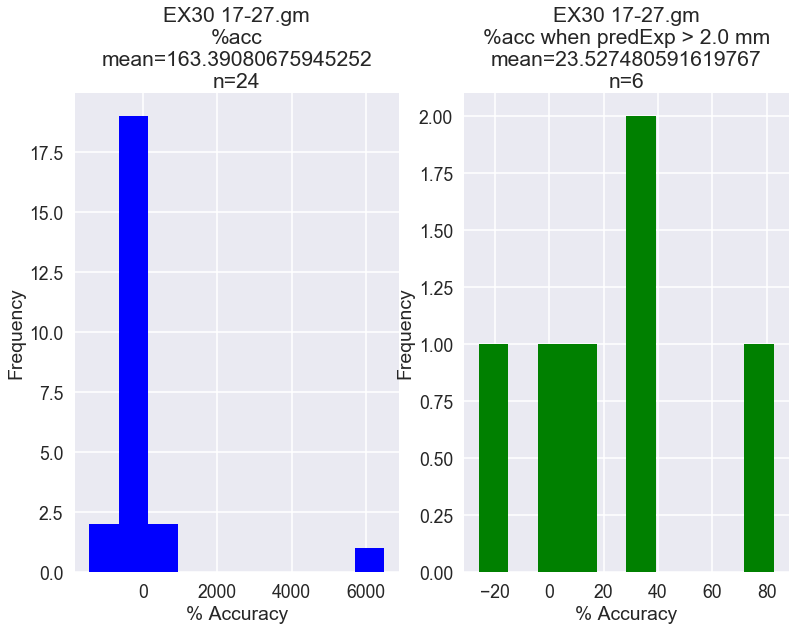

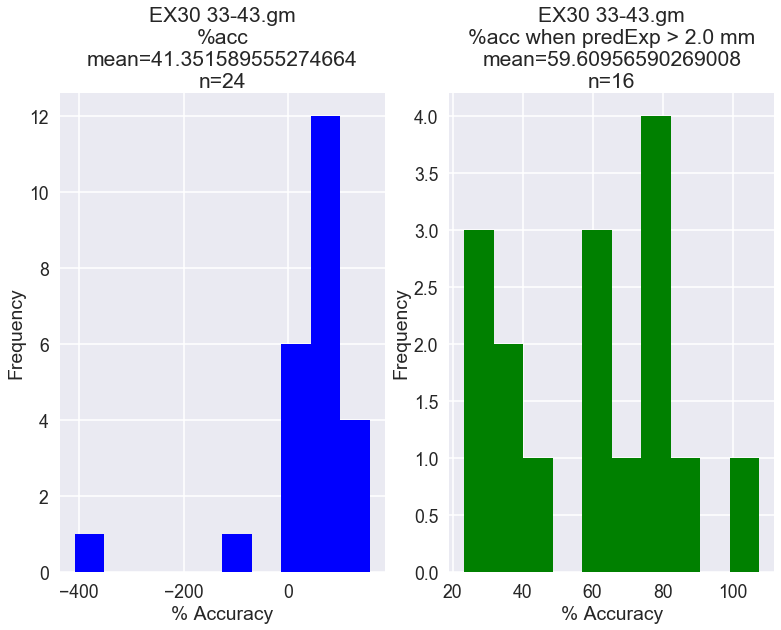

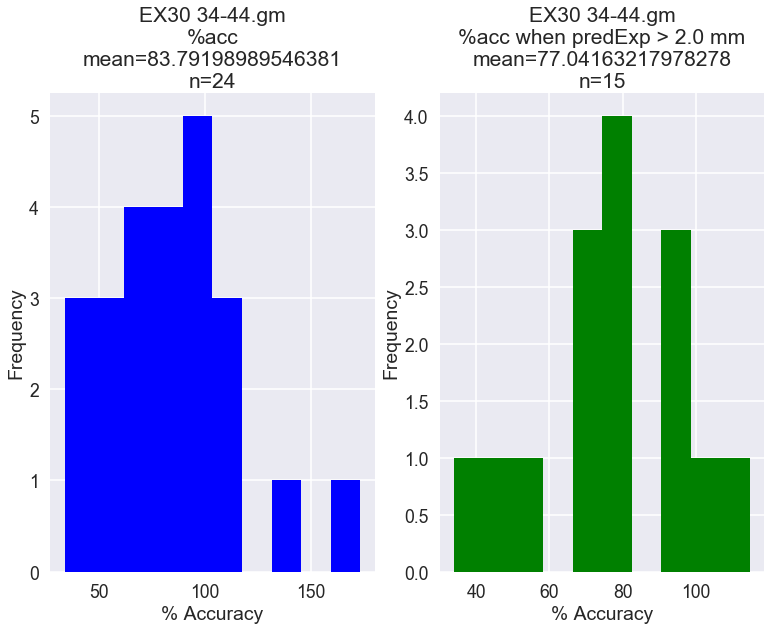

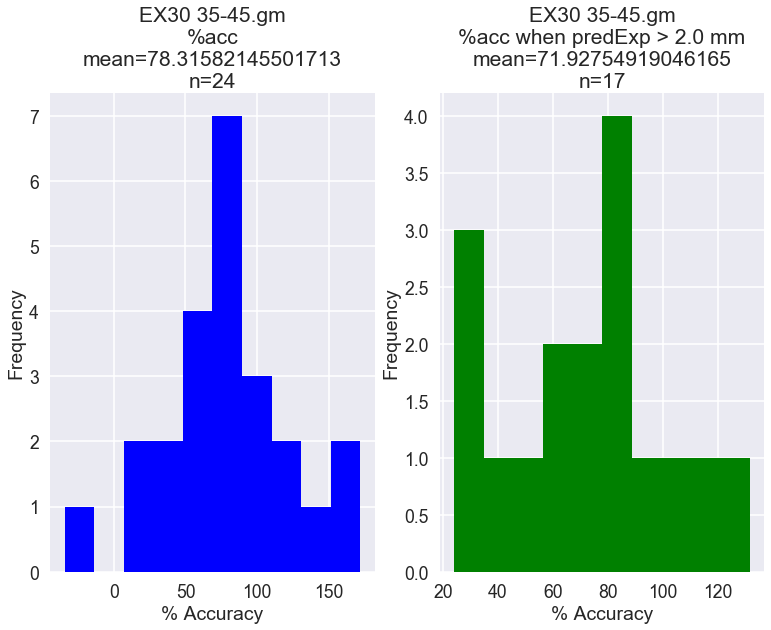

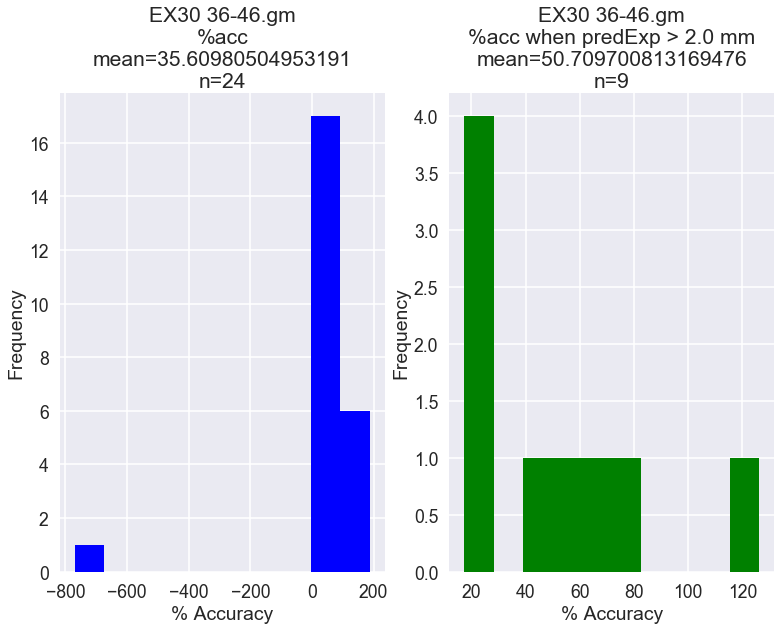

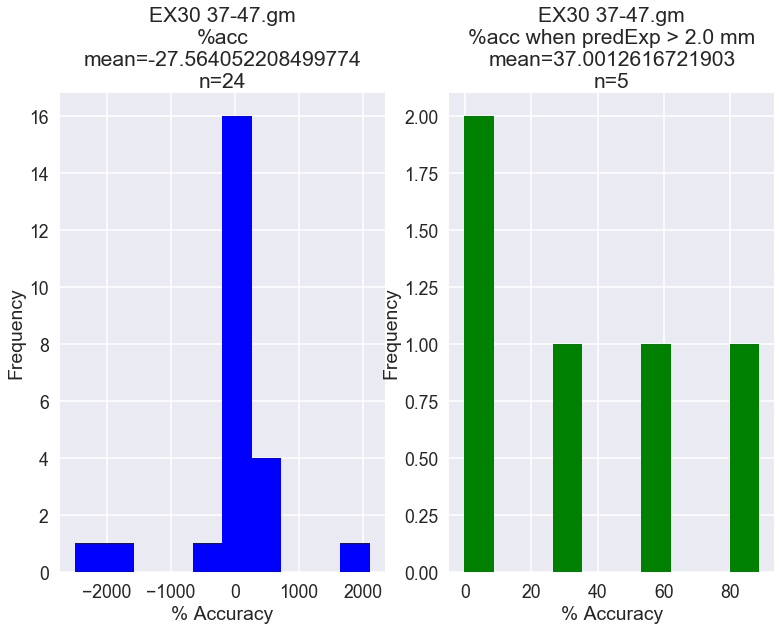

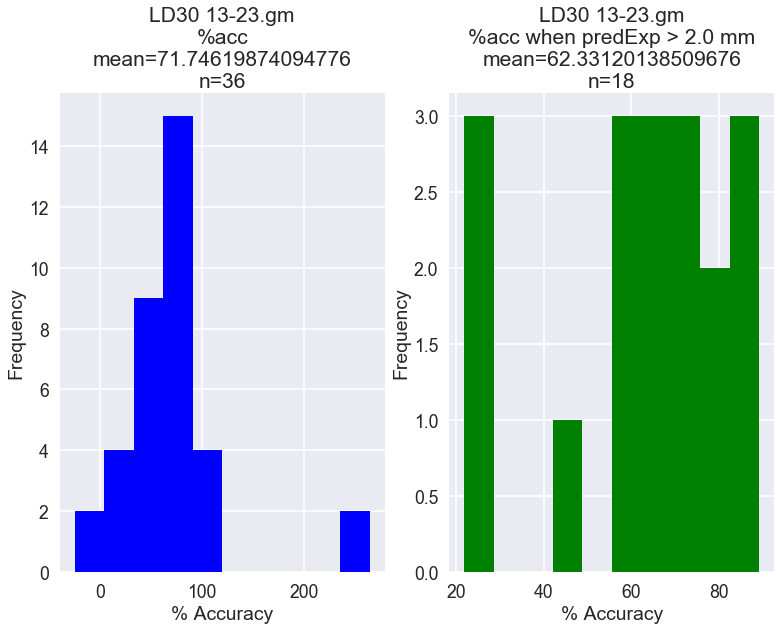

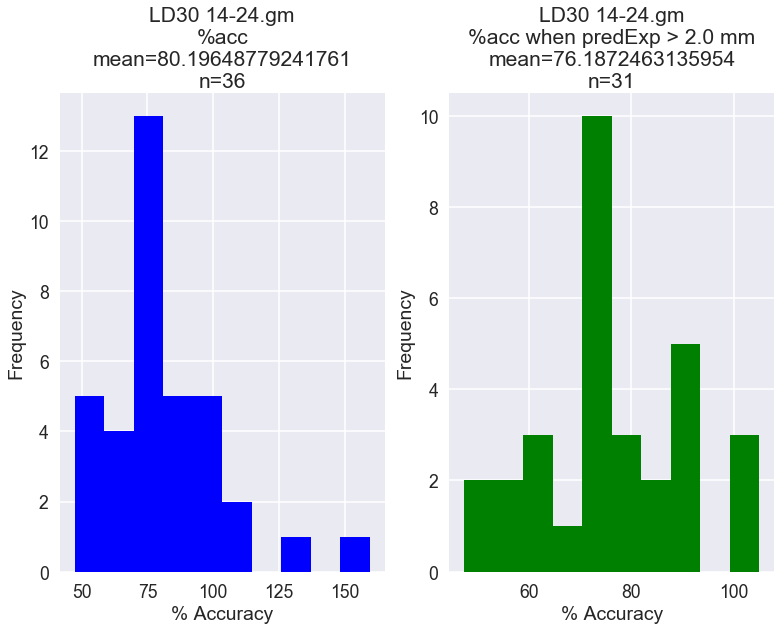

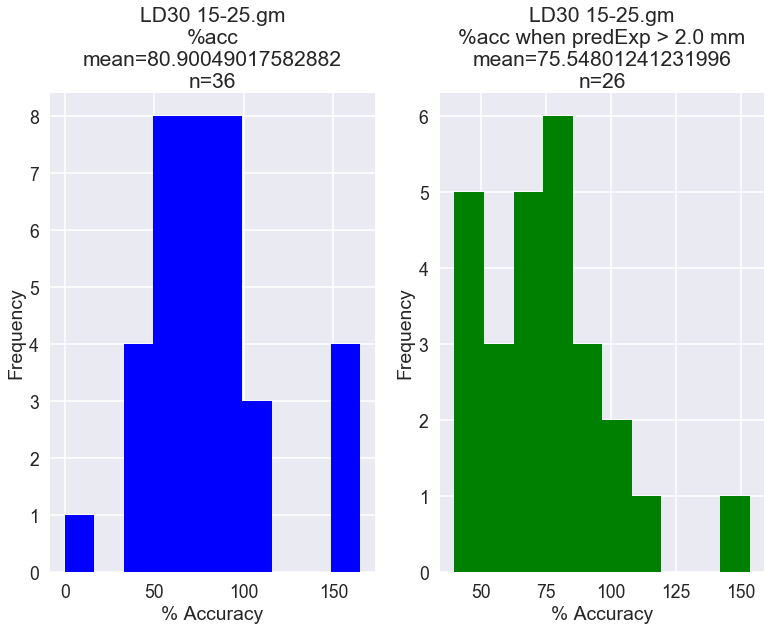

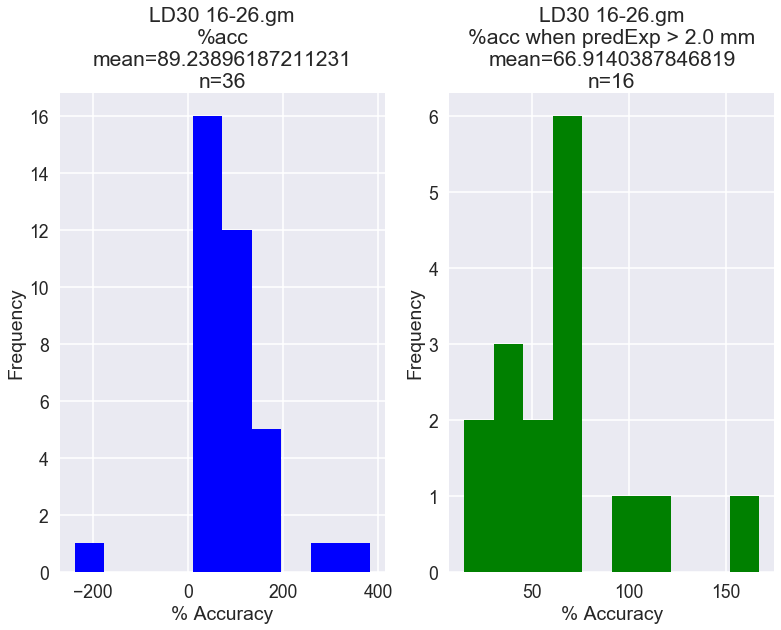

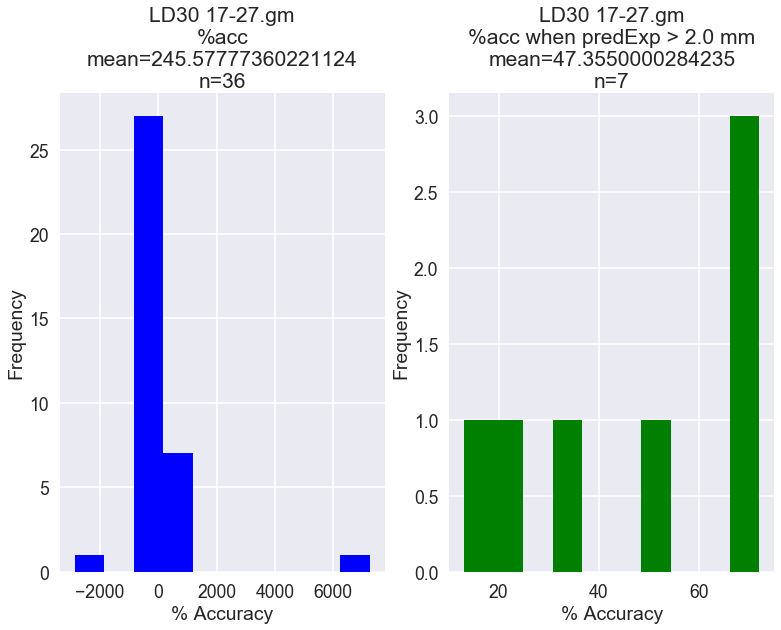

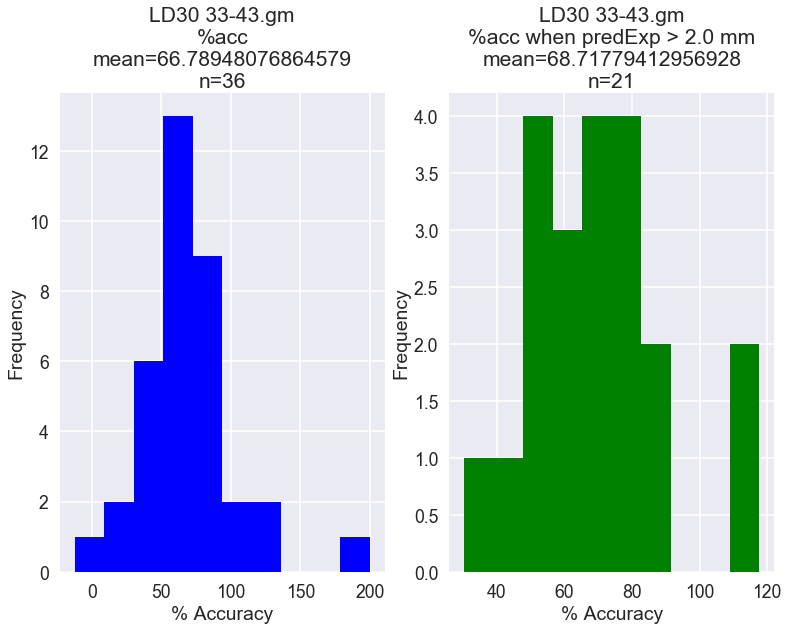

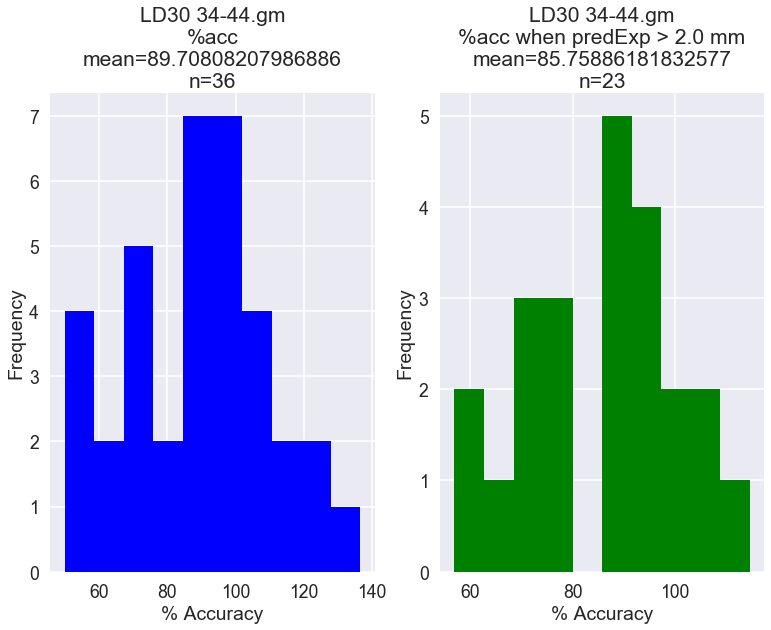

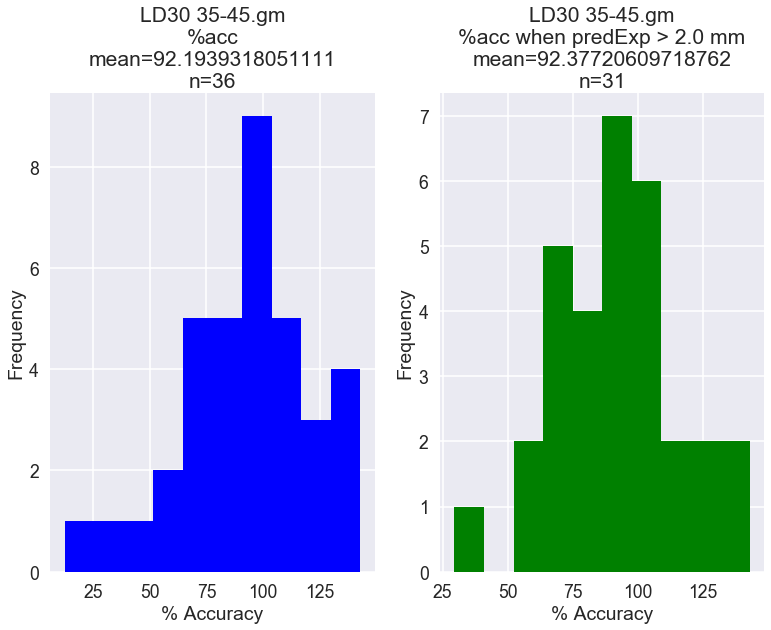

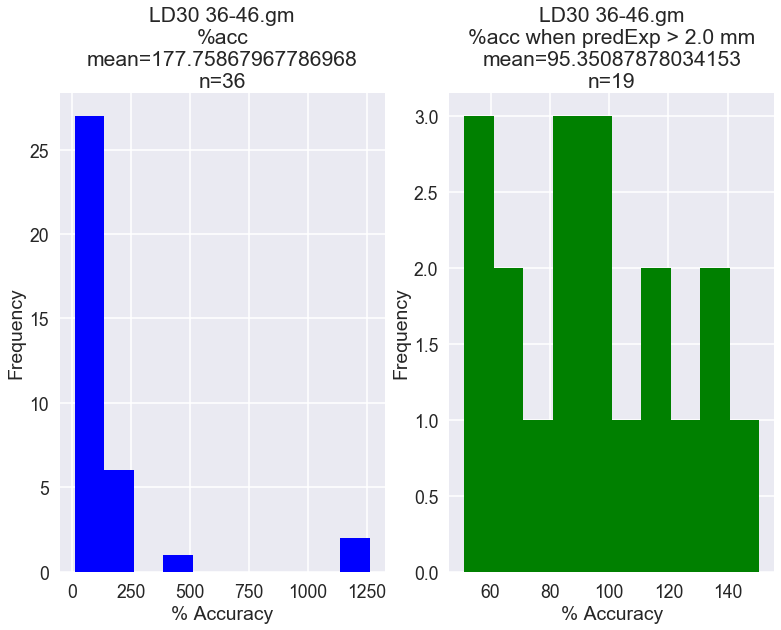

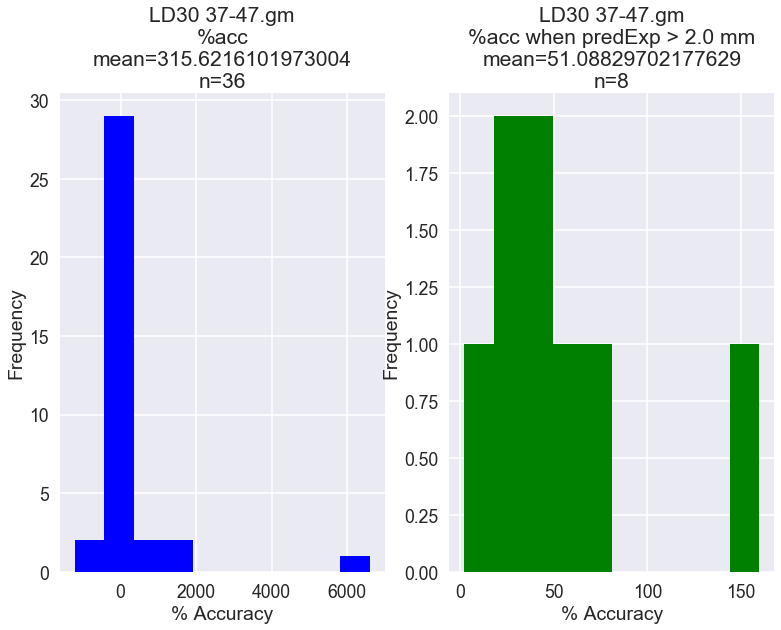

In [3]:
for measure_type in MEASURE_TYPES:
    plotHistograms(df, 'EX30', measure_type)
    plotHistograms(df, 'LD30', measure_type)